In [103]:
import re
import swifter
import spacy
import pandas as pd
from pathlib import Path
from typing import Tuple

nlp = spacy.load('en')

def parse_case_filename(fname: str) -> Tuple[int, str]:
    m = re.search(r'cases/(\d+)_(\w+).txt', str(fname))
    year = m.group(1)
    id = m.group(2)
    return year, id

case_files = [x for x in Path('cases').iterdir()]

years = []
ids = []
for x in case_files:
    year, id = parse_case_filename(x)
    years.append(year)
    ids.append(id)


def create_initial_df():
  df = pd.DataFrame(data={
      'caseid': ids,
      'year': years,
      'file': case_files},
                    columns=['caseid', 'year', 'file'])


  # SpaCy is so slow that even for this it takes half an hour :(
  df = df.sample(n=1000)

  df_md = pd.read_csv('case_metadata.csv')
  df_md = df_md.drop(['year'], axis=1)

  df = df.merge(df_md, on=['caseid'], how='left')

  def parse_file(fname: str):
      text = Path(fname).read_text()
      doc = nlp(text)
      return doc.to_bytes()

  df['doc_bytes'] = df['file'].swifter.apply(parse_file)

  with open('vocab.pkl', 'wb') as f:
      f.write(nlp.vocab.to_bytes())

  df.to_pickle('init_db.pkl')

def get_df():
    pck = Path('init_db.pkl')
    if not pck.exists():
        create_initial_df()

    assert Path('vocab.pkl').exists()

    nlp.vocab.from_bytes(Path('vocab.pkl').read_bytes())

    def bytes_to_doc(doc_bytes):
        return spacy.tokens.Doc(
            nlp.vocab
        ).from_bytes(doc_bytes)


    df = pd.read_pickle(str(pck))

    df['doc'] = df['doc_bytes'].swifter.apply(bytes_to_doc)
    return df




In [104]:

df = get_df()
df = df.drop(['doc_bytes'], axis=1)
df = df.dropna(axis=0)

print(f'We have {len(df)} examples')


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 2/1000 [00:00<04:49,  3.44it/s]

Pandas Apply:   0%|          | 3/1000 [00:00<04:01,  4.12it/s]

Pandas Apply:   0%|          | 5/1000 [00:01<05:06,  3.24it/s]

Pandas Apply:   1%|          | 6/1000 [00:02<06:04,  2.72it/s]

Pandas Apply:   1%|          | 7/1000 [00:02<05:47,  2.86it/s]

Pandas Apply:   1%|          | 8/1000 [00:02<06:16,  2.64it/s]

Pandas Apply:   1%|          | 9/1000 [00:03<05:27,  3.03it/s]

Pandas Apply:   1%|          | 10/1000 [00:03<04:40,  3.52it/s]

Pandas Apply:   1%|          | 12/1000 [00:03<04:34,  3.60it/s]

Pandas Apply:   1%|▏         | 13/1000 [00:03<04:00,  4.10it/s]

Pandas Apply:   1%|▏         | 14/1000 [00:04<06:32,  2.51it/s]

Pandas Apply:   2%|▏         | 17/1000 [00:05<05:12,  3.14it/s]

Pandas Apply:   2%|▏         | 18/1000 [00:05<06:26,  2.54it/s]

Pandas Apply:   2%|▏         | 19/1000 [00:06<07:14,  2.26it/s]

Pandas Apply:   2%|▏         | 20/1000 [00:06<07:48,  2.09it/s]

Pandas Apply:   2%|▏         | 21/1000 [00:07<06:28,  2.52it/s]

Pandas Apply:   2%|▏         | 22/1000 [00:08<12:29,  1.31it/s]

Pandas Apply:   2%|▏         | 23/1000 [00:08<09:51,  1.65it/s]

Pandas Apply:   2%|▏         | 24/1000 [00:09<07:49,  2.08it/s]

Pandas Apply:   2%|▎         | 25/1000 [00:09<09:11,  1.77it/s]

Pandas Apply:   3%|▎         | 26/1000 [00:10<09:51,  1.65it/s]

Pandas Apply:   3%|▎         | 27/1000 [00:10<08:52,  1.83it/s]

Pandas Apply:   3%|▎         | 29/1000 [00:11<06:50,  2.37it/s]

Pandas Apply:   3%|▎         | 30/1000 [00:11<06:19,  2.56it/s]

Pandas Apply:   3%|▎         | 31/1000 [00:11<05:34,  2.90it/s]

Pandas Apply:   3%|▎         | 32/1000 [00:12<06:06,  2.64it/s]

Pandas Apply:   3%|▎         | 33/1000 [00:12<05:11,  3.11it/s]

Pandas Apply:   3%|▎         | 34/1000 [00:12<04:22,  3.68it/s]

Pandas Apply:   4%|▎         | 35/1000 [00:12<04:36,  3.49it/s]

Pandas Apply:   4%|▎         | 36/1000 [00:13<06:19,  2.54it/s]

Pandas Apply:   4%|▎         | 37/1000 [00:14<06:48,  2.35it/s]

Pandas Apply:   4%|▍         | 38/1000 [00:14<06:24,  2.50it/s]

Pandas Apply:   4%|▍         | 39/1000 [00:14<06:34,  2.44it/s]

Pandas Apply:   4%|▍         | 40/1000 [00:15<06:17,  2.55it/s]

Pandas Apply:   4%|▍         | 42/1000 [00:16<07:36,  2.10it/s]

Pandas Apply:   4%|▍         | 43/1000 [00:17<10:09,  1.57it/s]

Pandas Apply:   4%|▍         | 44/1000 [00:17<07:52,  2.02it/s]

Pandas Apply:   4%|▍         | 45/1000 [00:17<06:37,  2.40it/s]

Pandas Apply:   5%|▍         | 46/1000 [00:18<06:15,  2.54it/s]

Pandas Apply:   5%|▍         | 47/1000 [00:18<06:31,  2.44it/s]

Pandas Apply:   5%|▍         | 48/1000 [00:19<08:41,  1.83it/s]

Pandas Apply:   5%|▍         | 49/1000 [00:19<06:58,  2.27it/s]

Pandas Apply:   5%|▌         | 50/1000 [00:21<10:48,  1.47it/s]

Pandas Apply:   5%|▌         | 51/1000 [00:21<08:43,  1.81it/s]

Pandas Apply:   5%|▌         | 53/1000 [00:21<06:22,  2.48it/s]

Pandas Apply:   5%|▌         | 54/1000 [00:21<06:37,  2.38it/s]

Pandas Apply:   6%|▌         | 55/1000 [00:21<05:17,  2.97it/s]

Pandas Apply:   6%|▌         | 56/1000 [00:22<04:46,  3.30it/s]

Pandas Apply:   6%|▌         | 57/1000 [00:22<05:16,  2.98it/s]

Pandas Apply:   6%|▌         | 58/1000 [00:22<05:05,  3.08it/s]

Pandas Apply:   6%|▌         | 59/1000 [00:23<04:55,  3.18it/s]

Pandas Apply:   6%|▌         | 60/1000 [00:23<04:44,  3.30it/s]

Pandas Apply:   6%|▌         | 61/1000 [00:25<10:48,  1.45it/s]

Pandas Apply:   6%|▌         | 62/1000 [00:25<10:01,  1.56it/s]

Pandas Apply:   6%|▋         | 63/1000 [00:25<07:56,  1.97it/s]

Pandas Apply:   6%|▋         | 64/1000 [00:26<08:11,  1.90it/s]

Pandas Apply:   6%|▋         | 65/1000 [00:26<07:34,  2.06it/s]

Pandas Apply:   7%|▋         | 66/1000 [00:27<07:30,  2.08it/s]

Pandas Apply:   7%|▋         | 67/1000 [00:27<06:43,  2.31it/s]

Pandas Apply:   7%|▋         | 69/1000 [00:27<05:13,  2.97it/s]

Pandas Apply:   7%|▋         | 70/1000 [00:27<04:35,  3.37it/s]

Pandas Apply:   7%|▋         | 72/1000 [00:28<04:46,  3.24it/s]

Pandas Apply:   7%|▋         | 73/1000 [00:28<04:52,  3.17it/s]

Pandas Apply:   7%|▋         | 74/1000 [00:29<04:10,  3.70it/s]

Pandas Apply:   8%|▊         | 75/1000 [00:29<04:09,  3.71it/s]

Pandas Apply:   8%|▊         | 76/1000 [00:29<03:55,  3.92it/s]

Pandas Apply:   8%|▊         | 77/1000 [00:29<04:06,  3.74it/s]

Pandas Apply:   8%|▊         | 78/1000 [00:30<06:36,  2.32it/s]

Pandas Apply:   8%|▊         | 79/1000 [00:31<08:24,  1.83it/s]

Pandas Apply:   8%|▊         | 80/1000 [00:31<07:10,  2.14it/s]

Pandas Apply:   8%|▊         | 81/1000 [00:32<07:49,  1.96it/s]

Pandas Apply:   8%|▊         | 82/1000 [00:32<07:37,  2.01it/s]

Pandas Apply:   8%|▊         | 83/1000 [00:33<07:19,  2.09it/s]

Pandas Apply:   8%|▊         | 84/1000 [00:33<06:28,  2.36it/s]

Pandas Apply:   8%|▊         | 85/1000 [00:33<06:04,  2.51it/s]

Pandas Apply:   9%|▊         | 86/1000 [00:34<05:27,  2.79it/s]

Pandas Apply:   9%|▊         | 87/1000 [00:34<05:52,  2.59it/s]

Pandas Apply:   9%|▉         | 88/1000 [00:34<05:10,  2.94it/s]

Pandas Apply:   9%|▉         | 89/1000 [00:35<06:15,  2.43it/s]

Pandas Apply:   9%|▉         | 90/1000 [00:35<05:56,  2.55it/s]

Pandas Apply:   9%|▉         | 91/1000 [00:36<06:03,  2.50it/s]

Pandas Apply:   9%|▉         | 92/1000 [00:36<06:11,  2.44it/s]

Pandas Apply:   9%|▉         | 93/1000 [00:37<07:44,  1.95it/s]

Pandas Apply:   9%|▉         | 94/1000 [00:38<07:57,  1.90it/s]

Pandas Apply:  10%|▉         | 95/1000 [00:38<06:56,  2.18it/s]

Pandas Apply:  10%|▉         | 96/1000 [00:38<06:19,  2.38it/s]

Pandas Apply:  10%|▉         | 97/1000 [00:39<08:30,  1.77it/s]

Pandas Apply:  10%|▉         | 98/1000 [00:40<09:43,  1.54it/s]

Pandas Apply:  10%|▉         | 99/1000 [00:40<08:52,  1.69it/s]

Pandas Apply:  10%|█         | 100/1000 [00:41<07:47,  1.93it/s]

Pandas Apply:  10%|█         | 101/1000 [00:41<06:25,  2.33it/s]

Pandas Apply:  10%|█         | 102/1000 [00:41<05:48,  2.58it/s]

Pandas Apply:  10%|█         | 103/1000 [00:42<05:54,  2.53it/s]

Pandas Apply:  10%|█         | 104/1000 [00:42<05:20,  2.80it/s]

Pandas Apply:  10%|█         | 105/1000 [00:42<06:19,  2.36it/s]

Pandas Apply:  11%|█         | 106/1000 [00:43<06:41,  2.22it/s]

Pandas Apply:  11%|█         | 108/1000 [00:44<06:24,  2.32it/s]

Pandas Apply:  11%|█         | 109/1000 [00:44<06:21,  2.33it/s]

Pandas Apply:  11%|█         | 110/1000 [00:44<05:25,  2.74it/s]

Pandas Apply:  11%|█         | 111/1000 [00:45<05:09,  2.87it/s]

Pandas Apply:  11%|█         | 112/1000 [00:45<06:31,  2.27it/s]

Pandas Apply:  11%|█▏        | 113/1000 [00:46<05:54,  2.51it/s]

Pandas Apply:  11%|█▏        | 114/1000 [00:46<06:51,  2.16it/s]

Pandas Apply:  12%|█▏        | 115/1000 [00:46<05:30,  2.68it/s]

Pandas Apply:  12%|█▏        | 116/1000 [00:47<06:15,  2.35it/s]

Pandas Apply:  12%|█▏        | 117/1000 [00:48<07:11,  2.05it/s]

Pandas Apply:  12%|█▏        | 119/1000 [00:48<05:50,  2.51it/s]

Pandas Apply:  12%|█▏        | 120/1000 [00:49<06:46,  2.16it/s]

Pandas Apply:  12%|█▏        | 121/1000 [00:49<05:24,  2.71it/s]

Pandas Apply:  12%|█▏        | 122/1000 [00:50<07:04,  2.07it/s]

Pandas Apply:  12%|█▏        | 123/1000 [00:50<06:36,  2.21it/s]

Pandas Apply:  12%|█▏        | 124/1000 [00:51<08:09,  1.79it/s]

Pandas Apply:  12%|█▎        | 125/1000 [00:51<08:05,  1.80it/s]

Pandas Apply:  13%|█▎        | 126/1000 [00:51<06:07,  2.38it/s]

Pandas Apply:  13%|█▎        | 127/1000 [00:52<05:10,  2.81it/s]

Pandas Apply:  13%|█▎        | 128/1000 [00:52<04:27,  3.25it/s]

Pandas Apply:  13%|█▎        | 129/1000 [00:53<08:10,  1.77it/s]

Pandas Apply:  13%|█▎        | 130/1000 [00:53<07:27,  1.94it/s]

Pandas Apply:  13%|█▎        | 131/1000 [00:54<08:43,  1.66it/s]

Pandas Apply:  13%|█▎        | 132/1000 [00:54<06:49,  2.12it/s]

Pandas Apply:  13%|█▎        | 134/1000 [00:55<05:16,  2.73it/s]

Pandas Apply:  14%|█▎        | 135/1000 [00:55<05:00,  2.88it/s]

Pandas Apply:  14%|█▎        | 136/1000 [00:55<05:36,  2.57it/s]

Pandas Apply:  14%|█▎        | 137/1000 [00:56<05:06,  2.81it/s]

Pandas Apply:  14%|█▍        | 138/1000 [00:56<05:04,  2.83it/s]

Pandas Apply:  14%|█▍        | 139/1000 [00:56<04:44,  3.03it/s]

Pandas Apply:  14%|█▍        | 140/1000 [00:57<07:24,  1.93it/s]

Pandas Apply:  14%|█▍        | 142/1000 [00:59<08:28,  1.69it/s]

Pandas Apply:  14%|█▍        | 143/1000 [00:59<08:18,  1.72it/s]

Pandas Apply:  14%|█▍        | 144/1000 [00:59<06:40,  2.14it/s]

Pandas Apply:  14%|█▍        | 145/1000 [01:00<05:43,  2.49it/s]

Pandas Apply:  15%|█▍        | 147/1000 [01:00<05:04,  2.80it/s]

Pandas Apply:  15%|█▍        | 148/1000 [01:01<05:02,  2.82it/s]

Pandas Apply:  15%|█▍        | 149/1000 [01:01<05:01,  2.82it/s]

Pandas Apply:  15%|█▌        | 150/1000 [01:01<04:23,  3.23it/s]

Pandas Apply:  15%|█▌        | 151/1000 [01:01<04:04,  3.47it/s]

Pandas Apply:  15%|█▌        | 153/1000 [01:02<04:02,  3.49it/s]

Pandas Apply:  15%|█▌        | 154/1000 [01:03<08:08,  1.73it/s]

Pandas Apply:  16%|█▌        | 155/1000 [01:04<07:03,  2.00it/s]

Pandas Apply:  16%|█▌        | 157/1000 [01:04<06:39,  2.11it/s]

Pandas Apply:  16%|█▌        | 159/1000 [01:05<05:03,  2.77it/s]

Pandas Apply:  16%|█▌        | 161/1000 [01:05<03:58,  3.51it/s]

Pandas Apply:  16%|█▌        | 162/1000 [01:05<04:21,  3.21it/s]

Pandas Apply:  16%|█▋        | 163/1000 [01:05<04:07,  3.39it/s]

Pandas Apply:  16%|█▋        | 164/1000 [01:06<06:52,  2.03it/s]

Pandas Apply:  16%|█▋        | 165/1000 [01:07<09:16,  1.50it/s]

Pandas Apply:  17%|█▋        | 166/1000 [01:08<07:26,  1.87it/s]

Pandas Apply:  17%|█▋        | 167/1000 [01:08<06:10,  2.25it/s]

Pandas Apply:  17%|█▋        | 168/1000 [01:08<05:01,  2.76it/s]

Pandas Apply:  17%|█▋        | 169/1000 [01:08<04:00,  3.45it/s]

Pandas Apply:  17%|█▋        | 170/1000 [01:09<04:17,  3.23it/s]

Pandas Apply:  17%|█▋        | 171/1000 [01:09<03:31,  3.92it/s]

Pandas Apply:  17%|█▋        | 172/1000 [01:09<03:26,  4.00it/s]

Pandas Apply:  17%|█▋        | 173/1000 [01:09<03:17,  4.18it/s]

Pandas Apply:  17%|█▋        | 174/1000 [01:10<05:00,  2.75it/s]

Pandas Apply:  18%|█▊        | 175/1000 [01:10<05:14,  2.62it/s]

Pandas Apply:  18%|█▊        | 176/1000 [01:10<04:37,  2.97it/s]

Pandas Apply:  18%|█▊        | 177/1000 [01:11<04:13,  3.24it/s]

Pandas Apply:  18%|█▊        | 179/1000 [01:11<04:19,  3.16it/s]

Pandas Apply:  18%|█▊        | 181/1000 [01:12<04:01,  3.40it/s]

Pandas Apply:  18%|█▊        | 182/1000 [01:13<06:28,  2.10it/s]

Pandas Apply:  18%|█▊        | 183/1000 [01:13<06:20,  2.15it/s]

Pandas Apply:  18%|█▊        | 184/1000 [01:13<05:36,  2.43it/s]

Pandas Apply:  18%|█▊        | 185/1000 [01:14<05:11,  2.61it/s]

Pandas Apply:  19%|█▊        | 186/1000 [01:14<05:47,  2.34it/s]

Pandas Apply:  19%|█▊        | 187/1000 [01:15<05:03,  2.68it/s]

Pandas Apply:  19%|█▉        | 188/1000 [01:15<05:43,  2.37it/s]

Pandas Apply:  19%|█▉        | 189/1000 [01:15<04:36,  2.93it/s]

Pandas Apply:  19%|█▉        | 190/1000 [01:15<03:51,  3.51it/s]

Pandas Apply:  19%|█▉        | 191/1000 [01:16<07:13,  1.87it/s]

Pandas Apply:  19%|█▉        | 192/1000 [01:17<06:49,  1.97it/s]

Pandas Apply:  19%|█▉        | 193/1000 [01:17<05:31,  2.43it/s]

Pandas Apply:  19%|█▉        | 194/1000 [01:17<04:39,  2.88it/s]

Pandas Apply:  20%|█▉        | 195/1000 [01:18<04:23,  3.06it/s]

Pandas Apply:  20%|█▉        | 196/1000 [01:18<04:12,  3.19it/s]

Pandas Apply:  20%|█▉        | 197/1000 [01:18<04:41,  2.86it/s]

Pandas Apply:  20%|█▉        | 198/1000 [01:19<05:59,  2.23it/s]

Pandas Apply:  20%|█▉        | 199/1000 [01:19<05:57,  2.24it/s]

Pandas Apply:  20%|██        | 200/1000 [01:20<04:59,  2.67it/s]

Pandas Apply:  20%|██        | 201/1000 [01:20<05:02,  2.65it/s]

Pandas Apply:  20%|██        | 202/1000 [01:21<05:58,  2.23it/s]

Pandas Apply:  20%|██        | 203/1000 [01:21<05:13,  2.54it/s]

Pandas Apply:  20%|██        | 204/1000 [01:21<04:25,  3.00it/s]

Pandas Apply:  20%|██        | 205/1000 [01:21<03:57,  3.35it/s]

Pandas Apply:  21%|██        | 206/1000 [01:22<03:34,  3.70it/s]

Pandas Apply:  21%|██        | 207/1000 [01:22<03:18,  4.00it/s]

Pandas Apply:  21%|██        | 208/1000 [01:22<03:19,  3.96it/s]

Pandas Apply:  21%|██        | 209/1000 [01:22<03:30,  3.76it/s]

Pandas Apply:  21%|██        | 210/1000 [01:25<12:03,  1.09it/s]

Pandas Apply:  21%|██        | 211/1000 [01:25<08:50,  1.49it/s]

Pandas Apply:  21%|██        | 212/1000 [01:25<06:42,  1.96it/s]

Pandas Apply:  21%|██▏       | 213/1000 [01:25<05:48,  2.26it/s]

Pandas Apply:  21%|██▏       | 214/1000 [01:26<05:19,  2.46it/s]

Pandas Apply:  22%|██▏       | 216/1000 [01:26<04:03,  3.22it/s]

Pandas Apply:  22%|██▏       | 217/1000 [01:26<04:40,  2.79it/s]

Pandas Apply:  22%|██▏       | 218/1000 [01:26<04:29,  2.91it/s]

Pandas Apply:  22%|██▏       | 219/1000 [01:27<05:36,  2.32it/s]

Pandas Apply:  22%|██▏       | 220/1000 [01:27<04:35,  2.83it/s]

Pandas Apply:  22%|██▏       | 221/1000 [01:28<03:59,  3.25it/s]

Pandas Apply:  22%|██▏       | 222/1000 [01:28<04:16,  3.03it/s]

Pandas Apply:  22%|██▏       | 223/1000 [01:28<03:52,  3.35it/s]

Pandas Apply:  22%|██▏       | 224/1000 [01:28<03:48,  3.39it/s]

Pandas Apply:  22%|██▎       | 225/1000 [01:29<03:43,  3.47it/s]

Pandas Apply:  23%|██▎       | 226/1000 [01:29<03:51,  3.34it/s]

Pandas Apply:  23%|██▎       | 227/1000 [01:29<03:14,  3.96it/s]

Pandas Apply:  23%|██▎       | 229/1000 [01:30<03:06,  4.14it/s]

Pandas Apply:  23%|██▎       | 230/1000 [01:30<03:45,  3.42it/s]

Pandas Apply:  23%|██▎       | 231/1000 [01:30<03:34,  3.58it/s]

Pandas Apply:  23%|██▎       | 233/1000 [01:32<06:00,  2.12it/s]

Pandas Apply:  24%|██▎       | 235/1000 [01:33<05:18,  2.40it/s]

Pandas Apply:  24%|██▎       | 236/1000 [01:33<04:21,  2.92it/s]

Pandas Apply:  24%|██▎       | 237/1000 [01:33<04:11,  3.04it/s]

Pandas Apply:  24%|██▍       | 238/1000 [01:33<04:07,  3.08it/s]

Pandas Apply:  24%|██▍       | 239/1000 [01:34<03:39,  3.47it/s]

Pandas Apply:  24%|██▍       | 240/1000 [01:34<03:56,  3.21it/s]

Pandas Apply:  24%|██▍       | 241/1000 [01:34<03:27,  3.66it/s]

Pandas Apply:  24%|██▍       | 242/1000 [01:34<03:06,  4.07it/s]

Pandas Apply:  24%|██▍       | 243/1000 [01:35<03:55,  3.21it/s]

Pandas Apply:  24%|██▍       | 244/1000 [01:35<03:42,  3.39it/s]

Pandas Apply:  24%|██▍       | 245/1000 [01:36<05:25,  2.32it/s]

Pandas Apply:  25%|██▍       | 246/1000 [01:36<04:43,  2.66it/s]

Pandas Apply:  25%|██▍       | 247/1000 [01:37<06:27,  1.94it/s]

Pandas Apply:  25%|██▍       | 248/1000 [01:38<07:35,  1.65it/s]

Pandas Apply:  25%|██▍       | 249/1000 [01:38<07:12,  1.74it/s]

Pandas Apply:  25%|██▌       | 250/1000 [01:39<06:44,  1.85it/s]

Pandas Apply:  25%|██▌       | 251/1000 [01:39<05:23,  2.32it/s]

Pandas Apply:  25%|██▌       | 252/1000 [01:40<06:15,  1.99it/s]

Pandas Apply:  25%|██▌       | 253/1000 [01:40<06:28,  1.92it/s]

Pandas Apply:  25%|██▌       | 254/1000 [01:41<06:45,  1.84it/s]

Pandas Apply:  26%|██▌       | 255/1000 [01:41<05:40,  2.18it/s]

Pandas Apply:  26%|██▌       | 256/1000 [01:41<05:19,  2.33it/s]

Pandas Apply:  26%|██▌       | 257/1000 [01:42<04:49,  2.57it/s]

Pandas Apply:  26%|██▌       | 258/1000 [01:42<04:26,  2.79it/s]

Pandas Apply:  26%|██▌       | 259/1000 [01:42<03:52,  3.19it/s]

Pandas Apply:  26%|██▌       | 260/1000 [01:42<03:53,  3.17it/s]

Pandas Apply:  26%|██▌       | 261/1000 [01:43<03:45,  3.28it/s]

Pandas Apply:  26%|██▌       | 262/1000 [01:43<04:04,  3.02it/s]

Pandas Apply:  26%|██▋       | 263/1000 [01:43<03:42,  3.32it/s]

Pandas Apply:  26%|██▋       | 264/1000 [01:44<04:43,  2.60it/s]

Pandas Apply:  26%|██▋       | 265/1000 [01:45<08:45,  1.40it/s]

Pandas Apply:  27%|██▋       | 266/1000 [01:46<08:39,  1.41it/s]

Pandas Apply:  27%|██▋       | 267/1000 [01:46<06:55,  1.77it/s]

Pandas Apply:  27%|██▋       | 268/1000 [01:47<06:20,  1.93it/s]

Pandas Apply:  27%|██▋       | 270/1000 [01:47<04:55,  2.47it/s]

Pandas Apply:  27%|██▋       | 271/1000 [01:47<03:48,  3.19it/s]

Pandas Apply:  27%|██▋       | 272/1000 [01:47<03:08,  3.86it/s]

Pandas Apply:  27%|██▋       | 274/1000 [01:48<02:42,  4.48it/s]

Pandas Apply:  28%|██▊       | 275/1000 [01:48<02:35,  4.66it/s]

Pandas Apply:  28%|██▊       | 276/1000 [01:48<02:10,  5.53it/s]

Pandas Apply:  28%|██▊       | 277/1000 [01:48<02:20,  5.13it/s]

Pandas Apply:  28%|██▊       | 278/1000 [01:49<04:21,  2.77it/s]

Pandas Apply:  28%|██▊       | 280/1000 [01:49<03:23,  3.54it/s]

Pandas Apply:  28%|██▊       | 281/1000 [01:51<07:54,  1.52it/s]

Pandas Apply:  28%|██▊       | 282/1000 [01:51<06:47,  1.76it/s]

Pandas Apply:  28%|██▊       | 283/1000 [01:51<06:23,  1.87it/s]

Pandas Apply:  28%|██▊       | 284/1000 [01:52<06:59,  1.71it/s]

Pandas Apply:  28%|██▊       | 285/1000 [01:52<05:41,  2.09it/s]

Pandas Apply:  29%|██▊       | 286/1000 [01:53<05:00,  2.37it/s]

Pandas Apply:  29%|██▉       | 288/1000 [01:53<03:59,  2.97it/s]

Pandas Apply:  29%|██▉       | 289/1000 [01:53<03:59,  2.97it/s]

Pandas Apply:  29%|██▉       | 290/1000 [01:53<03:40,  3.22it/s]

Pandas Apply:  29%|██▉       | 292/1000 [01:54<03:05,  3.82it/s]

Pandas Apply:  29%|██▉       | 293/1000 [01:55<07:11,  1.64it/s]

Pandas Apply:  29%|██▉       | 294/1000 [01:56<06:26,  1.83it/s]

Pandas Apply:  30%|██▉       | 295/1000 [01:56<05:48,  2.02it/s]

Pandas Apply:  30%|██▉       | 296/1000 [01:56<05:31,  2.12it/s]

Pandas Apply:  30%|██▉       | 297/1000 [01:57<04:39,  2.51it/s]

Pandas Apply:  30%|██▉       | 298/1000 [01:57<04:00,  2.91it/s]

Pandas Apply:  30%|███       | 300/1000 [01:57<03:26,  3.38it/s]

Pandas Apply:  30%|███       | 301/1000 [01:57<02:47,  4.16it/s]

Pandas Apply:  30%|███       | 302/1000 [01:58<03:17,  3.54it/s]

Pandas Apply:  30%|███       | 304/1000 [01:58<03:01,  3.84it/s]

Pandas Apply:  31%|███       | 306/1000 [01:59<03:21,  3.44it/s]

Pandas Apply:  31%|███       | 307/1000 [02:00<05:01,  2.30it/s]

Pandas Apply:  31%|███       | 308/1000 [02:00<04:11,  2.75it/s]

Pandas Apply:  31%|███       | 309/1000 [02:00<03:27,  3.33it/s]

Pandas Apply:  31%|███       | 310/1000 [02:01<04:29,  2.56it/s]

Pandas Apply:  31%|███       | 311/1000 [02:01<03:40,  3.12it/s]

Pandas Apply:  31%|███       | 312/1000 [02:02<05:36,  2.05it/s]

Pandas Apply:  31%|███▏      | 313/1000 [02:03<09:19,  1.23it/s]

Pandas Apply:  31%|███▏      | 314/1000 [02:03<07:07,  1.60it/s]

Pandas Apply:  32%|███▏      | 315/1000 [02:04<07:07,  1.60it/s]

Pandas Apply:  32%|███▏      | 316/1000 [02:05<08:45,  1.30it/s]

Pandas Apply:  32%|███▏      | 317/1000 [02:05<07:33,  1.50it/s]

Pandas Apply:  32%|███▏      | 318/1000 [02:06<06:00,  1.89it/s]

Pandas Apply:  32%|███▏      | 319/1000 [02:06<04:53,  2.32it/s]

Pandas Apply:  32%|███▏      | 320/1000 [02:07<06:14,  1.82it/s]

Pandas Apply:  32%|███▏      | 321/1000 [02:07<05:05,  2.22it/s]

Pandas Apply:  32%|███▏      | 322/1000 [02:08<05:47,  1.95it/s]

Pandas Apply:  32%|███▏      | 323/1000 [02:08<04:45,  2.37it/s]

Pandas Apply:  32%|███▏      | 324/1000 [02:08<04:29,  2.51it/s]

Pandas Apply:  33%|███▎      | 326/1000 [02:09<03:53,  2.88it/s]

Pandas Apply:  33%|███▎      | 327/1000 [02:09<03:27,  3.24it/s]

Pandas Apply:  33%|███▎      | 328/1000 [02:10<05:59,  1.87it/s]

Pandas Apply:  33%|███▎      | 329/1000 [02:10<05:04,  2.21it/s]

Pandas Apply:  33%|███▎      | 330/1000 [02:10<04:10,  2.68it/s]

Pandas Apply:  33%|███▎      | 332/1000 [02:11<03:23,  3.28it/s]

Pandas Apply:  33%|███▎      | 333/1000 [02:11<03:03,  3.64it/s]

Pandas Apply:  34%|███▎      | 335/1000 [02:11<02:36,  4.24it/s]

Pandas Apply:  34%|███▎      | 336/1000 [02:11<03:04,  3.60it/s]

Pandas Apply:  34%|███▎      | 337/1000 [02:12<02:44,  4.02it/s]

Pandas Apply:  34%|███▍      | 338/1000 [02:12<02:47,  3.95it/s]

Pandas Apply:  34%|███▍      | 339/1000 [02:12<02:44,  4.02it/s]

Pandas Apply:  34%|███▍      | 340/1000 [02:12<02:28,  4.44it/s]

Pandas Apply:  34%|███▍      | 341/1000 [02:13<04:22,  2.51it/s]

Pandas Apply:  34%|███▍      | 342/1000 [02:14<07:31,  1.46it/s]

Pandas Apply:  34%|███▍      | 343/1000 [02:15<06:32,  1.67it/s]

Pandas Apply:  34%|███▍      | 344/1000 [02:16<06:47,  1.61it/s]

Pandas Apply:  34%|███▍      | 345/1000 [02:17<09:42,  1.12it/s]

Pandas Apply:  35%|███▍      | 346/1000 [02:17<07:24,  1.47it/s]

Pandas Apply:  35%|███▍      | 347/1000 [02:18<06:33,  1.66it/s]

Pandas Apply:  35%|███▍      | 348/1000 [02:18<05:33,  1.96it/s]

Pandas Apply:  35%|███▍      | 349/1000 [02:18<05:34,  1.94it/s]

Pandas Apply:  35%|███▌      | 350/1000 [02:19<04:52,  2.23it/s]

Pandas Apply:  35%|███▌      | 351/1000 [02:19<05:20,  2.02it/s]

Pandas Apply:  35%|███▌      | 353/1000 [02:20<03:59,  2.70it/s]

Pandas Apply:  35%|███▌      | 354/1000 [02:20<04:48,  2.24it/s]

Pandas Apply:  36%|███▌      | 355/1000 [02:21<06:00,  1.79it/s]

Pandas Apply:  36%|███▌      | 356/1000 [02:21<04:40,  2.29it/s]

Pandas Apply:  36%|███▌      | 357/1000 [02:22<05:04,  2.11it/s]

Pandas Apply:  36%|███▌      | 358/1000 [02:22<04:37,  2.31it/s]

Pandas Apply:  36%|███▌      | 359/1000 [02:22<03:39,  2.92it/s]

Pandas Apply:  36%|███▌      | 361/1000 [02:23<03:27,  3.09it/s]

Pandas Apply:  36%|███▌      | 362/1000 [02:23<03:21,  3.17it/s]

Pandas Apply:  36%|███▋      | 363/1000 [02:24<03:54,  2.72it/s]

Pandas Apply:  36%|███▋      | 364/1000 [02:24<03:29,  3.04it/s]

Pandas Apply:  36%|███▋      | 365/1000 [02:24<03:47,  2.79it/s]

Pandas Apply:  37%|███▋      | 366/1000 [02:24<02:58,  3.55it/s]

Pandas Apply:  37%|███▋      | 367/1000 [02:25<04:19,  2.44it/s]

Pandas Apply:  37%|███▋      | 368/1000 [02:25<04:31,  2.33it/s]

Pandas Apply:  37%|███▋      | 369/1000 [02:26<04:05,  2.57it/s]

Pandas Apply:  37%|███▋      | 370/1000 [02:26<05:03,  2.07it/s]

Pandas Apply:  37%|███▋      | 371/1000 [02:27<05:18,  1.98it/s]

Pandas Apply:  37%|███▋      | 372/1000 [02:27<05:07,  2.04it/s]

Pandas Apply:  37%|███▋      | 373/1000 [02:28<04:53,  2.14it/s]

Pandas Apply:  37%|███▋      | 374/1000 [02:28<04:52,  2.14it/s]

Pandas Apply:  38%|███▊      | 375/1000 [02:28<03:46,  2.76it/s]

Pandas Apply:  38%|███▊      | 376/1000 [02:29<03:03,  3.41it/s]

Pandas Apply:  38%|███▊      | 377/1000 [02:29<03:08,  3.30it/s]

Pandas Apply:  38%|███▊      | 379/1000 [02:29<02:54,  3.57it/s]

Pandas Apply:  38%|███▊      | 380/1000 [02:30<02:32,  4.06it/s]

Pandas Apply:  38%|███▊      | 381/1000 [02:30<02:24,  4.29it/s]

Pandas Apply:  38%|███▊      | 382/1000 [02:30<02:01,  5.08it/s]

Pandas Apply:  38%|███▊      | 383/1000 [02:30<02:48,  3.66it/s]

Pandas Apply:  38%|███▊      | 384/1000 [02:31<04:20,  2.37it/s]

Pandas Apply:  38%|███▊      | 385/1000 [02:32<04:43,  2.17it/s]

Pandas Apply:  39%|███▊      | 387/1000 [02:32<03:28,  2.94it/s]

Pandas Apply:  39%|███▉      | 388/1000 [02:32<03:24,  2.99it/s]

Pandas Apply:  39%|███▉      | 389/1000 [02:32<03:18,  3.08it/s]

Pandas Apply:  39%|███▉      | 390/1000 [02:33<03:25,  2.97it/s]

Pandas Apply:  39%|███▉      | 391/1000 [02:33<03:53,  2.60it/s]

Pandas Apply:  39%|███▉      | 392/1000 [02:33<03:05,  3.27it/s]

Pandas Apply:  39%|███▉      | 393/1000 [02:34<02:47,  3.62it/s]

Pandas Apply:  39%|███▉      | 394/1000 [02:34<02:49,  3.58it/s]

Pandas Apply:  40%|███▉      | 395/1000 [02:34<02:22,  4.25it/s]

Pandas Apply:  40%|███▉      | 396/1000 [02:34<02:44,  3.66it/s]

Pandas Apply:  40%|███▉      | 397/1000 [02:36<05:33,  1.81it/s]

Pandas Apply:  40%|███▉      | 398/1000 [02:36<04:21,  2.30it/s]

Pandas Apply:  40%|███▉      | 399/1000 [02:37<05:33,  1.80it/s]

Pandas Apply:  40%|████      | 400/1000 [02:37<04:46,  2.10it/s]

Pandas Apply:  40%|████      | 402/1000 [02:37<03:40,  2.71it/s]

Pandas Apply:  40%|████      | 403/1000 [02:37<03:14,  3.07it/s]

Pandas Apply:  40%|████      | 404/1000 [02:38<05:12,  1.91it/s]

Pandas Apply:  40%|████      | 405/1000 [02:39<04:57,  2.00it/s]

Pandas Apply:  41%|████      | 406/1000 [02:39<05:31,  1.79it/s]

Pandas Apply:  41%|████      | 407/1000 [02:40<04:25,  2.23it/s]

Pandas Apply:  41%|████      | 408/1000 [02:40<03:28,  2.84it/s]

Pandas Apply:  41%|████      | 409/1000 [02:41<05:12,  1.89it/s]

Pandas Apply:  41%|████      | 410/1000 [02:41<04:15,  2.31it/s]

Pandas Apply:  41%|████      | 411/1000 [02:41<03:55,  2.50it/s]

Pandas Apply:  41%|████      | 412/1000 [02:42<03:49,  2.56it/s]

Pandas Apply:  41%|████▏     | 413/1000 [02:42<03:44,  2.61it/s]

Pandas Apply:  41%|████▏     | 414/1000 [02:42<03:23,  2.88it/s]

Pandas Apply:  42%|████▏     | 415/1000 [02:43<04:34,  2.13it/s]

Pandas Apply:  42%|████▏     | 416/1000 [02:44<04:55,  1.98it/s]

Pandas Apply:  42%|████▏     | 418/1000 [02:44<03:35,  2.70it/s]

Pandas Apply:  42%|████▏     | 419/1000 [02:44<03:22,  2.87it/s]

Pandas Apply:  42%|████▏     | 421/1000 [02:44<02:51,  3.37it/s]

Pandas Apply:  42%|████▏     | 422/1000 [02:45<05:09,  1.87it/s]

Pandas Apply:  42%|████▏     | 423/1000 [02:46<06:06,  1.58it/s]

Pandas Apply:  42%|████▏     | 424/1000 [02:47<06:02,  1.59it/s]

Pandas Apply:  42%|████▎     | 425/1000 [02:47<04:39,  2.06it/s]

Pandas Apply:  43%|████▎     | 426/1000 [02:47<04:00,  2.38it/s]

Pandas Apply:  43%|████▎     | 427/1000 [02:48<05:18,  1.80it/s]

Pandas Apply:  43%|████▎     | 428/1000 [02:49<05:06,  1.87it/s]

Pandas Apply:  43%|████▎     | 429/1000 [02:49<04:47,  1.99it/s]

Pandas Apply:  43%|████▎     | 431/1000 [02:49<03:30,  2.71it/s]

Pandas Apply:  43%|████▎     | 432/1000 [02:49<02:58,  3.18it/s]

Pandas Apply:  43%|████▎     | 433/1000 [02:50<02:48,  3.37it/s]

Pandas Apply:  43%|████▎     | 434/1000 [02:50<03:56,  2.39it/s]

Pandas Apply:  44%|████▎     | 435/1000 [02:51<03:07,  3.01it/s]

Pandas Apply:  44%|████▎     | 437/1000 [02:51<02:47,  3.36it/s]

Pandas Apply:  44%|████▍     | 438/1000 [02:51<02:15,  4.14it/s]

Pandas Apply:  44%|████▍     | 439/1000 [02:51<01:58,  4.74it/s]

Pandas Apply:  44%|████▍     | 440/1000 [02:52<04:27,  2.09it/s]

Pandas Apply:  44%|████▍     | 441/1000 [02:53<04:52,  1.91it/s]

Pandas Apply:  44%|████▍     | 442/1000 [02:53<04:29,  2.07it/s]

Pandas Apply:  44%|████▍     | 443/1000 [02:54<04:32,  2.05it/s]

Pandas Apply:  44%|████▍     | 444/1000 [02:54<04:49,  1.92it/s]

Pandas Apply:  44%|████▍     | 445/1000 [02:55<04:22,  2.12it/s]

Pandas Apply:  45%|████▍     | 446/1000 [02:55<04:42,  1.96it/s]

Pandas Apply:  45%|████▍     | 447/1000 [02:56<04:14,  2.18it/s]

Pandas Apply:  45%|████▍     | 448/1000 [02:56<04:59,  1.84it/s]

Pandas Apply:  45%|████▍     | 449/1000 [02:57<03:50,  2.39it/s]

Pandas Apply:  45%|████▌     | 450/1000 [02:57<03:18,  2.77it/s]

Pandas Apply:  45%|████▌     | 451/1000 [02:57<02:45,  3.32it/s]

Pandas Apply:  45%|████▌     | 453/1000 [02:58<02:41,  3.39it/s]

Pandas Apply:  46%|████▌     | 455/1000 [02:58<02:38,  3.44it/s]

Pandas Apply:  46%|████▌     | 456/1000 [02:58<02:56,  3.07it/s]

Pandas Apply:  46%|████▌     | 457/1000 [02:59<02:33,  3.54it/s]

Pandas Apply:  46%|████▌     | 459/1000 [02:59<02:35,  3.47it/s]

Pandas Apply:  46%|████▌     | 460/1000 [03:00<04:26,  2.03it/s]

Pandas Apply:  46%|████▌     | 461/1000 [03:01<04:13,  2.12it/s]

Pandas Apply:  46%|████▋     | 463/1000 [03:01<03:11,  2.81it/s]

Pandas Apply:  46%|████▋     | 464/1000 [03:01<03:12,  2.79it/s]

Pandas Apply:  46%|████▋     | 465/1000 [03:01<02:36,  3.41it/s]

Pandas Apply:  47%|████▋     | 466/1000 [03:02<02:16,  3.90it/s]

Pandas Apply:  47%|████▋     | 467/1000 [03:02<02:32,  3.50it/s]

Pandas Apply:  47%|████▋     | 468/1000 [03:02<02:49,  3.14it/s]

Pandas Apply:  47%|████▋     | 469/1000 [03:02<02:25,  3.66it/s]

Pandas Apply:  47%|████▋     | 470/1000 [03:03<02:23,  3.69it/s]

Pandas Apply:  47%|████▋     | 471/1000 [03:03<02:30,  3.52it/s]

Pandas Apply:  47%|████▋     | 472/1000 [03:04<03:07,  2.82it/s]

Pandas Apply:  47%|████▋     | 473/1000 [03:04<03:07,  2.80it/s]

Pandas Apply:  47%|████▋     | 474/1000 [03:04<02:59,  2.94it/s]

Pandas Apply:  48%|████▊     | 475/1000 [03:05<02:52,  3.05it/s]

Pandas Apply:  48%|████▊     | 476/1000 [03:05<02:51,  3.05it/s]

Pandas Apply:  48%|████▊     | 478/1000 [03:05<02:40,  3.26it/s]

Pandas Apply:  48%|████▊     | 479/1000 [03:06<02:46,  3.12it/s]

Pandas Apply:  48%|████▊     | 480/1000 [03:06<02:26,  3.55it/s]

Pandas Apply:  48%|████▊     | 481/1000 [03:06<02:41,  3.20it/s]

Pandas Apply:  48%|████▊     | 482/1000 [03:07<03:27,  2.50it/s]

Pandas Apply:  48%|████▊     | 484/1000 [03:07<02:36,  3.29it/s]

Pandas Apply:  48%|████▊     | 485/1000 [03:07<02:33,  3.35it/s]

Pandas Apply:  49%|████▊     | 486/1000 [03:07<02:04,  4.12it/s]

Pandas Apply:  49%|████▊     | 487/1000 [03:08<01:47,  4.78it/s]

Pandas Apply:  49%|████▉     | 488/1000 [03:09<03:49,  2.23it/s]

Pandas Apply:  49%|████▉     | 489/1000 [03:10<06:13,  1.37it/s]

Pandas Apply:  49%|████▉     | 490/1000 [03:11<05:50,  1.45it/s]

Pandas Apply:  49%|████▉     | 491/1000 [03:11<04:40,  1.81it/s]

Pandas Apply:  49%|████▉     | 492/1000 [03:11<03:32,  2.39it/s]

Pandas Apply:  49%|████▉     | 493/1000 [03:11<02:53,  2.93it/s]

Pandas Apply:  49%|████▉     | 494/1000 [03:11<03:06,  2.71it/s]

Pandas Apply:  50%|████▉     | 495/1000 [03:12<03:40,  2.29it/s]

Pandas Apply:  50%|████▉     | 496/1000 [03:12<02:54,  2.88it/s]

Pandas Apply:  50%|████▉     | 497/1000 [03:13<04:56,  1.70it/s]

Pandas Apply:  50%|████▉     | 498/1000 [03:14<04:22,  1.91it/s]

Pandas Apply:  50%|████▉     | 499/1000 [03:14<03:25,  2.44it/s]

Pandas Apply:  50%|█████     | 500/1000 [03:14<03:38,  2.28it/s]

Pandas Apply:  50%|█████     | 501/1000 [03:15<02:54,  2.85it/s]

Pandas Apply:  50%|█████     | 502/1000 [03:15<04:03,  2.04it/s]

Pandas Apply:  50%|█████     | 503/1000 [03:16<04:25,  1.87it/s]

Pandas Apply:  50%|█████     | 504/1000 [03:17<04:33,  1.81it/s]

Pandas Apply:  50%|█████     | 505/1000 [03:17<03:40,  2.24it/s]

Pandas Apply:  51%|█████     | 506/1000 [03:17<03:55,  2.09it/s]

Pandas Apply:  51%|█████     | 507/1000 [03:18<04:30,  1.82it/s]

Pandas Apply:  51%|█████     | 508/1000 [03:19<04:21,  1.88it/s]

Pandas Apply:  51%|█████     | 509/1000 [03:19<03:41,  2.22it/s]

Pandas Apply:  51%|█████     | 510/1000 [03:19<03:03,  2.67it/s]

Pandas Apply:  51%|█████     | 511/1000 [03:19<02:23,  3.40it/s]

Pandas Apply:  51%|█████     | 512/1000 [03:19<02:14,  3.63it/s]

Pandas Apply:  51%|█████▏    | 513/1000 [03:20<02:37,  3.09it/s]

Pandas Apply:  51%|█████▏    | 514/1000 [03:21<04:20,  1.87it/s]

Pandas Apply:  52%|█████▏    | 515/1000 [03:21<03:54,  2.07it/s]

Pandas Apply:  52%|█████▏    | 516/1000 [03:22<03:50,  2.10it/s]

Pandas Apply:  52%|█████▏    | 517/1000 [03:22<03:16,  2.46it/s]

Pandas Apply:  52%|█████▏    | 518/1000 [03:22<02:37,  3.06it/s]

Pandas Apply:  52%|█████▏    | 519/1000 [03:22<02:17,  3.50it/s]

Pandas Apply:  52%|█████▏    | 520/1000 [03:22<01:59,  4.03it/s]

Pandas Apply:  52%|█████▏    | 521/1000 [03:23<01:49,  4.36it/s]

Pandas Apply:  52%|█████▏    | 523/1000 [03:23<02:09,  3.68it/s]

Pandas Apply:  52%|█████▏    | 524/1000 [03:23<01:51,  4.26it/s]

Pandas Apply:  53%|█████▎    | 526/1000 [03:24<01:32,  5.10it/s]

Pandas Apply:  53%|█████▎    | 527/1000 [03:24<03:00,  2.62it/s]

Pandas Apply:  53%|█████▎    | 528/1000 [03:25<03:08,  2.51it/s]

Pandas Apply:  53%|█████▎    | 529/1000 [03:26<03:50,  2.05it/s]

Pandas Apply:  53%|█████▎    | 530/1000 [03:26<03:37,  2.17it/s]

Pandas Apply:  53%|█████▎    | 531/1000 [03:27<05:12,  1.50it/s]

Pandas Apply:  53%|█████▎    | 532/1000 [03:28<04:53,  1.59it/s]

Pandas Apply:  53%|█████▎    | 533/1000 [03:28<04:06,  1.89it/s]

Pandas Apply:  53%|█████▎    | 534/1000 [03:28<03:48,  2.04it/s]

Pandas Apply:  54%|█████▎    | 535/1000 [03:29<03:10,  2.44it/s]

Pandas Apply:  54%|█████▎    | 536/1000 [03:29<02:54,  2.66it/s]

Pandas Apply:  54%|█████▎    | 537/1000 [03:29<02:30,  3.08it/s]

Pandas Apply:  54%|█████▍    | 538/1000 [03:30<03:20,  2.30it/s]

Pandas Apply:  54%|█████▍    | 539/1000 [03:30<02:56,  2.61it/s]

Pandas Apply:  54%|█████▍    | 540/1000 [03:30<02:24,  3.19it/s]

Pandas Apply:  54%|█████▍    | 541/1000 [03:31<04:06,  1.86it/s]

Pandas Apply:  54%|█████▍    | 542/1000 [03:32<03:31,  2.17it/s]

Pandas Apply:  54%|█████▍    | 543/1000 [03:32<02:59,  2.55it/s]

Pandas Apply:  55%|█████▍    | 545/1000 [03:32<02:48,  2.70it/s]

Pandas Apply:  55%|█████▍    | 547/1000 [03:33<02:08,  3.52it/s]

Pandas Apply:  55%|█████▍    | 548/1000 [03:33<01:58,  3.83it/s]

Pandas Apply:  55%|█████▍    | 549/1000 [03:33<02:02,  3.67it/s]

Pandas Apply:  55%|█████▌    | 551/1000 [03:33<01:42,  4.37it/s]

Pandas Apply:  55%|█████▌    | 552/1000 [03:34<01:36,  4.62it/s]

Pandas Apply:  55%|█████▌    | 553/1000 [03:34<01:54,  3.92it/s]

Pandas Apply:  55%|█████▌    | 554/1000 [03:34<01:58,  3.76it/s]

Pandas Apply:  56%|█████▌    | 555/1000 [03:35<02:18,  3.22it/s]

Pandas Apply:  56%|█████▌    | 556/1000 [03:36<03:50,  1.93it/s]

Pandas Apply:  56%|█████▌    | 557/1000 [03:36<03:16,  2.25it/s]

Pandas Apply:  56%|█████▌    | 558/1000 [03:36<03:29,  2.11it/s]

Pandas Apply:  56%|█████▌    | 559/1000 [03:37<04:02,  1.82it/s]

Pandas Apply:  56%|█████▌    | 560/1000 [03:37<03:16,  2.24it/s]

Pandas Apply:  56%|█████▌    | 561/1000 [03:38<02:48,  2.61it/s]

Pandas Apply:  56%|█████▌    | 562/1000 [03:38<02:30,  2.91it/s]

Pandas Apply:  56%|█████▋    | 563/1000 [03:38<02:28,  2.94it/s]

Pandas Apply:  56%|█████▋    | 564/1000 [03:38<02:20,  3.10it/s]

Pandas Apply:  56%|█████▋    | 565/1000 [03:39<03:51,  1.88it/s]

Pandas Apply:  57%|█████▋    | 566/1000 [03:40<03:22,  2.15it/s]

Pandas Apply:  57%|█████▋    | 567/1000 [03:40<03:14,  2.22it/s]

Pandas Apply:  57%|█████▋    | 568/1000 [03:41<03:06,  2.32it/s]

Pandas Apply:  57%|█████▋    | 569/1000 [03:41<02:35,  2.78it/s]

Pandas Apply:  57%|█████▋    | 571/1000 [03:41<02:03,  3.47it/s]

Pandas Apply:  57%|█████▋    | 573/1000 [03:41<01:51,  3.83it/s]

Pandas Apply:  57%|█████▊    | 575/1000 [03:42<01:41,  4.21it/s]

Pandas Apply:  58%|█████▊    | 576/1000 [03:42<01:35,  4.44it/s]

Pandas Apply:  58%|█████▊    | 577/1000 [03:42<01:43,  4.07it/s]

Pandas Apply:  58%|█████▊    | 578/1000 [03:43<02:03,  3.41it/s]

Pandas Apply:  58%|█████▊    | 580/1000 [03:43<01:46,  3.96it/s]

Pandas Apply:  58%|█████▊    | 581/1000 [03:43<01:41,  4.11it/s]

Pandas Apply:  58%|█████▊    | 582/1000 [03:43<01:48,  3.86it/s]

Pandas Apply:  58%|█████▊    | 583/1000 [03:44<02:59,  2.33it/s]

Pandas Apply:  58%|█████▊    | 584/1000 [03:45<03:15,  2.13it/s]

Pandas Apply:  58%|█████▊    | 585/1000 [03:45<02:33,  2.71it/s]

Pandas Apply:  59%|█████▊    | 586/1000 [03:46<03:25,  2.02it/s]

Pandas Apply:  59%|█████▊    | 587/1000 [03:46<02:51,  2.40it/s]

Pandas Apply:  59%|█████▉    | 588/1000 [03:46<02:47,  2.46it/s]

Pandas Apply:  59%|█████▉    | 589/1000 [03:47<02:12,  3.10it/s]

Pandas Apply:  59%|█████▉    | 591/1000 [03:47<01:53,  3.61it/s]

Pandas Apply:  59%|█████▉    | 592/1000 [03:47<01:56,  3.49it/s]

Pandas Apply:  59%|█████▉    | 593/1000 [03:47<01:40,  4.06it/s]

Pandas Apply:  59%|█████▉    | 594/1000 [03:48<02:18,  2.94it/s]

Pandas Apply:  60%|█████▉    | 595/1000 [03:48<01:53,  3.56it/s]

Pandas Apply:  60%|█████▉    | 596/1000 [03:48<01:58,  3.41it/s]

Pandas Apply:  60%|█████▉    | 597/1000 [03:49<01:41,  3.97it/s]

Pandas Apply:  60%|█████▉    | 598/1000 [03:49<01:48,  3.72it/s]

Pandas Apply:  60%|█████▉    | 599/1000 [03:49<02:22,  2.81it/s]

Pandas Apply:  60%|██████    | 600/1000 [03:50<02:09,  3.09it/s]

Pandas Apply:  60%|██████    | 601/1000 [03:50<03:08,  2.12it/s]

Pandas Apply:  60%|██████    | 602/1000 [03:51<02:38,  2.50it/s]

Pandas Apply:  60%|██████    | 604/1000 [03:51<02:18,  2.85it/s]

Pandas Apply:  60%|██████    | 605/1000 [03:51<01:59,  3.31it/s]

Pandas Apply:  61%|██████    | 606/1000 [03:52<02:33,  2.56it/s]

Pandas Apply:  61%|██████    | 608/1000 [03:52<02:03,  3.16it/s]

Pandas Apply:  61%|██████    | 609/1000 [03:52<01:45,  3.69it/s]

Pandas Apply:  61%|██████    | 610/1000 [03:53<02:17,  2.84it/s]

Pandas Apply:  61%|██████    | 611/1000 [03:53<02:23,  2.70it/s]

Pandas Apply:  61%|██████▏   | 613/1000 [03:54<01:52,  3.43it/s]

Pandas Apply:  61%|██████▏   | 614/1000 [03:54<03:04,  2.09it/s]

Pandas Apply:  62%|██████▏   | 616/1000 [03:55<02:32,  2.52it/s]

Pandas Apply:  62%|██████▏   | 618/1000 [03:55<02:19,  2.74it/s]

Pandas Apply:  62%|██████▏   | 619/1000 [03:56<01:57,  3.24it/s]

Pandas Apply:  62%|██████▏   | 620/1000 [03:56<01:44,  3.63it/s]

Pandas Apply:  62%|██████▏   | 621/1000 [03:56<02:20,  2.70it/s]

Pandas Apply:  62%|██████▏   | 622/1000 [03:57<02:00,  3.14it/s]

Pandas Apply:  62%|██████▏   | 623/1000 [03:57<02:08,  2.94it/s]

Pandas Apply:  62%|██████▎   | 625/1000 [03:57<01:49,  3.43it/s]

Pandas Apply:  63%|██████▎   | 626/1000 [03:58<01:34,  3.97it/s]

Pandas Apply:  63%|██████▎   | 627/1000 [03:58<01:36,  3.85it/s]

Pandas Apply:  63%|██████▎   | 628/1000 [03:58<01:19,  4.70it/s]

Pandas Apply:  63%|██████▎   | 629/1000 [03:58<01:29,  4.13it/s]

Pandas Apply:  63%|██████▎   | 632/1000 [03:59<01:23,  4.38it/s]

Pandas Apply:  63%|██████▎   | 633/1000 [03:59<01:24,  4.35it/s]

Pandas Apply:  63%|██████▎   | 634/1000 [03:59<01:44,  3.49it/s]

Pandas Apply:  64%|██████▎   | 635/1000 [04:00<01:29,  4.09it/s]

Pandas Apply:  64%|██████▎   | 637/1000 [04:00<01:19,  4.57it/s]

Pandas Apply:  64%|██████▍   | 638/1000 [04:00<01:14,  4.83it/s]

Pandas Apply:  64%|██████▍   | 639/1000 [04:00<01:06,  5.44it/s]

Pandas Apply:  64%|██████▍   | 640/1000 [04:01<01:21,  4.39it/s]

Pandas Apply:  64%|██████▍   | 641/1000 [04:01<01:52,  3.20it/s]

Pandas Apply:  64%|██████▍   | 642/1000 [04:01<01:41,  3.52it/s]

Pandas Apply:  64%|██████▍   | 643/1000 [04:02<02:29,  2.38it/s]

Pandas Apply:  64%|██████▍   | 644/1000 [04:03<02:32,  2.34it/s]

Pandas Apply:  64%|██████▍   | 645/1000 [04:03<02:33,  2.32it/s]

Pandas Apply:  65%|██████▍   | 646/1000 [04:03<02:01,  2.92it/s]

Pandas Apply:  65%|██████▍   | 647/1000 [04:03<02:07,  2.76it/s]

Pandas Apply:  65%|██████▍   | 648/1000 [04:05<03:40,  1.60it/s]

Pandas Apply:  65%|██████▍   | 649/1000 [04:05<03:03,  1.91it/s]

Pandas Apply:  65%|██████▌   | 651/1000 [04:05<02:26,  2.39it/s]

Pandas Apply:  65%|██████▌   | 652/1000 [04:06<02:15,  2.58it/s]

Pandas Apply:  65%|██████▌   | 653/1000 [04:06<02:30,  2.30it/s]

Pandas Apply:  65%|██████▌   | 654/1000 [04:06<01:58,  2.91it/s]

Pandas Apply:  66%|██████▌   | 655/1000 [04:07<01:53,  3.04it/s]

Pandas Apply:  66%|██████▌   | 656/1000 [04:07<01:46,  3.22it/s]

Pandas Apply:  66%|██████▌   | 657/1000 [04:07<01:31,  3.76it/s]

Pandas Apply:  66%|██████▌   | 658/1000 [04:07<01:47,  3.19it/s]

Pandas Apply:  66%|██████▌   | 660/1000 [04:08<01:22,  4.10it/s]

Pandas Apply:  66%|██████▌   | 661/1000 [04:08<01:27,  3.89it/s]

Pandas Apply:  66%|██████▌   | 662/1000 [04:08<01:28,  3.83it/s]

Pandas Apply:  66%|██████▋   | 663/1000 [04:09<01:45,  3.21it/s]

Pandas Apply:  66%|██████▋   | 665/1000 [04:09<01:30,  3.71it/s]

Pandas Apply:  67%|██████▋   | 666/1000 [04:09<01:48,  3.09it/s]

Pandas Apply:  67%|██████▋   | 667/1000 [04:10<01:32,  3.62it/s]

Pandas Apply:  67%|██████▋   | 668/1000 [04:10<01:35,  3.48it/s]

Pandas Apply:  67%|██████▋   | 669/1000 [04:10<01:20,  4.09it/s]

Pandas Apply:  67%|██████▋   | 670/1000 [04:10<01:23,  3.95it/s]

Pandas Apply:  67%|██████▋   | 671/1000 [04:11<01:28,  3.70it/s]

Pandas Apply:  67%|██████▋   | 672/1000 [04:11<01:29,  3.66it/s]

Pandas Apply:  67%|██████▋   | 673/1000 [04:12<02:04,  2.62it/s]

Pandas Apply:  67%|██████▋   | 674/1000 [04:12<01:42,  3.17it/s]

Pandas Apply:  68%|██████▊   | 675/1000 [04:12<02:12,  2.45it/s]

Pandas Apply:  68%|██████▊   | 676/1000 [04:13<02:14,  2.41it/s]

Pandas Apply:  68%|██████▊   | 677/1000 [04:13<01:45,  3.06it/s]

Pandas Apply:  68%|██████▊   | 678/1000 [04:13<01:30,  3.57it/s]

Pandas Apply:  68%|██████▊   | 679/1000 [04:14<03:00,  1.78it/s]

Pandas Apply:  68%|██████▊   | 680/1000 [04:15<03:04,  1.74it/s]

Pandas Apply:  68%|██████▊   | 681/1000 [04:15<02:44,  1.94it/s]

Pandas Apply:  68%|██████▊   | 682/1000 [04:15<02:07,  2.50it/s]

Pandas Apply:  68%|██████▊   | 683/1000 [04:16<02:02,  2.60it/s]

Pandas Apply:  68%|██████▊   | 684/1000 [04:16<02:21,  2.23it/s]

Pandas Apply:  68%|██████▊   | 685/1000 [04:17<02:39,  1.97it/s]

Pandas Apply:  69%|██████▊   | 686/1000 [04:17<02:16,  2.29it/s]

Pandas Apply:  69%|██████▊   | 687/1000 [04:18<02:12,  2.36it/s]

Pandas Apply:  69%|██████▉   | 688/1000 [04:18<02:20,  2.22it/s]

Pandas Apply:  69%|██████▉   | 689/1000 [04:19<02:54,  1.78it/s]

Pandas Apply:  69%|██████▉   | 690/1000 [04:19<02:19,  2.21it/s]

Pandas Apply:  69%|██████▉   | 691/1000 [04:20<02:18,  2.23it/s]

Pandas Apply:  69%|██████▉   | 692/1000 [04:20<02:21,  2.18it/s]

Pandas Apply:  69%|██████▉   | 693/1000 [04:21<02:26,  2.09it/s]

Pandas Apply:  69%|██████▉   | 694/1000 [04:21<02:57,  1.72it/s]

Pandas Apply:  70%|██████▉   | 695/1000 [04:22<02:22,  2.14it/s]

Pandas Apply:  70%|██████▉   | 696/1000 [04:22<01:58,  2.57it/s]

Pandas Apply:  70%|██████▉   | 698/1000 [04:22<01:41,  2.96it/s]

Pandas Apply:  70%|██████▉   | 699/1000 [04:23<01:31,  3.29it/s]

Pandas Apply:  70%|███████   | 700/1000 [04:23<01:29,  3.35it/s]

Pandas Apply:  70%|███████   | 701/1000 [04:23<01:26,  3.45it/s]

Pandas Apply:  70%|███████   | 702/1000 [04:23<01:23,  3.55it/s]

Pandas Apply:  70%|███████   | 703/1000 [04:24<01:27,  3.41it/s]

Pandas Apply:  70%|███████   | 705/1000 [04:24<01:20,  3.65it/s]

Pandas Apply:  71%|███████   | 707/1000 [04:25<01:15,  3.89it/s]

Pandas Apply:  71%|███████   | 708/1000 [04:25<01:34,  3.08it/s]

Pandas Apply:  71%|███████   | 709/1000 [04:26<02:12,  2.19it/s]

Pandas Apply:  71%|███████   | 710/1000 [04:26<02:08,  2.25it/s]

Pandas Apply:  71%|███████   | 712/1000 [04:27<02:15,  2.13it/s]

Pandas Apply:  71%|███████▏  | 713/1000 [04:27<01:43,  2.76it/s]

Pandas Apply:  71%|███████▏  | 714/1000 [04:28<01:39,  2.88it/s]

Pandas Apply:  72%|███████▏  | 715/1000 [04:28<01:23,  3.42it/s]

Pandas Apply:  72%|███████▏  | 716/1000 [04:28<01:08,  4.17it/s]

Pandas Apply:  72%|███████▏  | 717/1000 [04:29<01:55,  2.45it/s]

Pandas Apply:  72%|███████▏  | 718/1000 [04:29<01:36,  2.93it/s]

Pandas Apply:  72%|███████▏  | 719/1000 [04:29<01:17,  3.62it/s]

Pandas Apply:  72%|███████▏  | 720/1000 [04:29<01:03,  4.40it/s]

Pandas Apply:  72%|███████▏  | 721/1000 [04:30<01:21,  3.42it/s]

Pandas Apply:  72%|███████▏  | 722/1000 [04:30<01:23,  3.31it/s]

Pandas Apply:  72%|███████▏  | 723/1000 [04:30<01:34,  2.93it/s]

Pandas Apply:  72%|███████▏  | 724/1000 [04:31<01:38,  2.80it/s]

Pandas Apply:  72%|███████▎  | 725/1000 [04:32<02:10,  2.11it/s]

Pandas Apply:  73%|███████▎  | 726/1000 [04:32<01:47,  2.55it/s]

Pandas Apply:  73%|███████▎  | 727/1000 [04:32<01:52,  2.42it/s]

Pandas Apply:  73%|███████▎  | 728/1000 [04:33<02:32,  1.78it/s]

Pandas Apply:  73%|███████▎  | 729/1000 [04:34<02:44,  1.65it/s]

Pandas Apply:  73%|███████▎  | 730/1000 [04:34<02:15,  1.99it/s]

Pandas Apply:  73%|███████▎  | 731/1000 [04:34<01:45,  2.55it/s]

Pandas Apply:  73%|███████▎  | 732/1000 [04:35<02:24,  1.86it/s]

Pandas Apply:  73%|███████▎  | 733/1000 [04:36<02:43,  1.64it/s]

Pandas Apply:  73%|███████▎  | 734/1000 [04:36<02:05,  2.12it/s]

Pandas Apply:  74%|███████▎  | 735/1000 [04:39<05:34,  1.26s/it]

Pandas Apply:  74%|███████▎  | 737/1000 [04:39<04:00,  1.09it/s]

Pandas Apply:  74%|███████▍  | 738/1000 [04:40<03:20,  1.31it/s]

Pandas Apply:  74%|███████▍  | 739/1000 [04:40<02:50,  1.53it/s]

Pandas Apply:  74%|███████▍  | 740/1000 [04:40<02:15,  1.92it/s]

Pandas Apply:  74%|███████▍  | 741/1000 [04:41<01:51,  2.33it/s]

Pandas Apply:  74%|███████▍  | 742/1000 [04:42<02:43,  1.58it/s]

Pandas Apply:  74%|███████▍  | 743/1000 [04:43<03:06,  1.38it/s]

Pandas Apply:  74%|███████▍  | 744/1000 [04:43<02:40,  1.59it/s]

Pandas Apply:  74%|███████▍  | 745/1000 [04:43<02:01,  2.10it/s]

Pandas Apply:  75%|███████▍  | 746/1000 [04:43<01:36,  2.63it/s]

Pandas Apply:  75%|███████▍  | 747/1000 [04:43<01:19,  3.19it/s]

Pandas Apply:  75%|███████▍  | 748/1000 [04:45<02:36,  1.61it/s]

Pandas Apply:  75%|███████▍  | 749/1000 [04:45<02:12,  1.90it/s]

Pandas Apply:  75%|███████▌  | 750/1000 [04:46<02:17,  1.82it/s]

Pandas Apply:  75%|███████▌  | 751/1000 [04:46<02:19,  1.79it/s]

Pandas Apply:  75%|███████▌  | 752/1000 [04:49<04:36,  1.11s/it]

Pandas Apply:  75%|███████▌  | 753/1000 [04:49<03:23,  1.21it/s]

Pandas Apply:  75%|███████▌  | 754/1000 [04:49<02:46,  1.48it/s]

Pandas Apply:  76%|███████▌  | 755/1000 [04:49<02:15,  1.81it/s]

Pandas Apply:  76%|███████▌  | 756/1000 [04:50<02:21,  1.72it/s]

Pandas Apply:  76%|███████▌  | 757/1000 [04:51<02:39,  1.52it/s]

Pandas Apply:  76%|███████▌  | 758/1000 [04:51<02:04,  1.94it/s]

Pandas Apply:  76%|███████▌  | 760/1000 [04:51<01:32,  2.60it/s]

Pandas Apply:  76%|███████▌  | 761/1000 [04:52<01:23,  2.86it/s]

Pandas Apply:  76%|███████▌  | 762/1000 [04:52<01:30,  2.63it/s]

Pandas Apply:  76%|███████▋  | 763/1000 [04:52<01:25,  2.76it/s]

Pandas Apply:  76%|███████▋  | 764/1000 [04:53<02:13,  1.77it/s]

Pandas Apply:  76%|███████▋  | 765/1000 [04:54<01:45,  2.22it/s]

Pandas Apply:  77%|███████▋  | 766/1000 [04:54<01:38,  2.37it/s]

Pandas Apply:  77%|███████▋  | 767/1000 [04:55<01:50,  2.11it/s]

Pandas Apply:  77%|███████▋  | 768/1000 [04:55<01:26,  2.67it/s]

Pandas Apply:  77%|███████▋  | 769/1000 [04:55<01:16,  3.03it/s]

Pandas Apply:  77%|███████▋  | 770/1000 [04:55<01:13,  3.11it/s]

Pandas Apply:  77%|███████▋  | 772/1000 [04:56<01:14,  3.08it/s]

Pandas Apply:  77%|███████▋  | 773/1000 [04:56<01:20,  2.82it/s]

Pandas Apply:  77%|███████▋  | 774/1000 [04:57<01:30,  2.50it/s]

Pandas Apply:  78%|███████▊  | 775/1000 [04:57<01:33,  2.41it/s]

Pandas Apply:  78%|███████▊  | 776/1000 [04:57<01:12,  3.07it/s]

Pandas Apply:  78%|███████▊  | 778/1000 [04:58<01:11,  3.10it/s]

Pandas Apply:  78%|███████▊  | 779/1000 [04:58<01:18,  2.80it/s]

Pandas Apply:  78%|███████▊  | 780/1000 [04:59<01:17,  2.85it/s]

Pandas Apply:  78%|███████▊  | 781/1000 [04:59<01:35,  2.28it/s]

Pandas Apply:  78%|███████▊  | 783/1000 [05:00<01:13,  2.94it/s]

Pandas Apply:  78%|███████▊  | 785/1000 [05:00<01:00,  3.56it/s]

Pandas Apply:  79%|███████▊  | 786/1000 [05:00<00:54,  3.92it/s]

Pandas Apply:  79%|███████▊  | 787/1000 [05:01<01:30,  2.34it/s]

Pandas Apply:  79%|███████▉  | 789/1000 [05:01<01:15,  2.80it/s]

Pandas Apply:  79%|███████▉  | 790/1000 [05:02<01:06,  3.14it/s]

Pandas Apply:  79%|███████▉  | 792/1000 [05:02<00:58,  3.53it/s]

Pandas Apply:  79%|███████▉  | 794/1000 [05:02<00:54,  3.77it/s]

Pandas Apply:  80%|███████▉  | 795/1000 [05:03<01:02,  3.26it/s]

Pandas Apply:  80%|███████▉  | 796/1000 [05:04<01:36,  2.11it/s]

Pandas Apply:  80%|███████▉  | 797/1000 [05:04<01:32,  2.20it/s]

Pandas Apply:  80%|███████▉  | 798/1000 [05:04<01:20,  2.50it/s]

Pandas Apply:  80%|███████▉  | 799/1000 [05:05<01:39,  2.02it/s]

Pandas Apply:  80%|████████  | 800/1000 [05:05<01:19,  2.51it/s]

Pandas Apply:  80%|████████  | 801/1000 [05:05<01:06,  2.98it/s]

Pandas Apply:  80%|████████  | 802/1000 [05:06<00:55,  3.54it/s]

Pandas Apply:  80%|████████  | 803/1000 [05:06<00:46,  4.23it/s]

Pandas Apply:  80%|████████  | 804/1000 [05:06<00:39,  5.00it/s]

Pandas Apply:  80%|████████  | 805/1000 [05:06<00:47,  4.10it/s]

Pandas Apply:  81%|████████  | 807/1000 [05:07<00:52,  3.70it/s]

Pandas Apply:  81%|████████  | 809/1000 [05:07<00:51,  3.72it/s]

Pandas Apply:  81%|████████  | 810/1000 [05:08<00:52,  3.61it/s]

Pandas Apply:  81%|████████  | 811/1000 [05:09<01:42,  1.85it/s]

Pandas Apply:  81%|████████  | 812/1000 [05:09<01:19,  2.36it/s]

Pandas Apply:  81%|████████▏ | 813/1000 [05:10<01:36,  1.94it/s]

Pandas Apply:  81%|████████▏ | 814/1000 [05:10<01:18,  2.38it/s]

Pandas Apply:  82%|████████▏ | 815/1000 [05:10<01:09,  2.65it/s]

Pandas Apply:  82%|████████▏ | 816/1000 [05:10<01:02,  2.93it/s]

Pandas Apply:  82%|████████▏ | 817/1000 [05:11<00:51,  3.52it/s]

Pandas Apply:  82%|████████▏ | 818/1000 [05:11<01:10,  2.57it/s]

Pandas Apply:  82%|████████▏ | 820/1000 [05:12<01:23,  2.16it/s]

Pandas Apply:  82%|████████▏ | 821/1000 [05:13<01:26,  2.07it/s]

Pandas Apply:  82%|████████▏ | 822/1000 [05:13<01:11,  2.48it/s]

Pandas Apply:  82%|████████▏ | 824/1000 [05:13<00:53,  3.31it/s]

Pandas Apply:  82%|████████▎ | 825/1000 [05:14<01:09,  2.52it/s]

Pandas Apply:  83%|████████▎ | 826/1000 [05:15<01:24,  2.06it/s]

Pandas Apply:  83%|████████▎ | 827/1000 [05:15<01:07,  2.55it/s]

Pandas Apply:  83%|████████▎ | 828/1000 [05:15<01:17,  2.21it/s]

Pandas Apply:  83%|████████▎ | 829/1000 [05:16<01:03,  2.70it/s]

Pandas Apply:  83%|████████▎ | 830/1000 [05:16<01:03,  2.69it/s]

Pandas Apply:  83%|████████▎ | 831/1000 [05:17<01:16,  2.20it/s]

Pandas Apply:  83%|████████▎ | 832/1000 [05:17<01:05,  2.58it/s]

Pandas Apply:  83%|████████▎ | 833/1000 [05:17<01:02,  2.69it/s]

Pandas Apply:  83%|████████▎ | 834/1000 [05:18<01:35,  1.74it/s]

Pandas Apply:  84%|████████▎ | 835/1000 [05:18<01:16,  2.16it/s]

Pandas Apply:  84%|████████▎ | 836/1000 [05:19<01:23,  1.95it/s]

Pandas Apply:  84%|████████▎ | 837/1000 [05:19<01:14,  2.19it/s]

Pandas Apply:  84%|████████▍ | 838/1000 [05:20<01:06,  2.44it/s]

Pandas Apply:  84%|████████▍ | 839/1000 [05:20<01:02,  2.59it/s]

Pandas Apply:  84%|████████▍ | 840/1000 [05:20<00:52,  3.03it/s]

Pandas Apply:  84%|████████▍ | 841/1000 [05:21<00:59,  2.67it/s]

Pandas Apply:  84%|████████▍ | 842/1000 [05:21<00:59,  2.67it/s]

Pandas Apply:  84%|████████▍ | 843/1000 [05:22<01:04,  2.43it/s]

Pandas Apply:  84%|████████▍ | 844/1000 [05:23<01:35,  1.63it/s]

Pandas Apply:  84%|████████▍ | 845/1000 [05:23<01:21,  1.89it/s]

Pandas Apply:  85%|████████▍ | 846/1000 [05:24<01:26,  1.79it/s]

Pandas Apply:  85%|████████▍ | 847/1000 [05:24<01:21,  1.87it/s]

Pandas Apply:  85%|████████▍ | 848/1000 [05:25<01:35,  1.58it/s]

Pandas Apply:  85%|████████▍ | 849/1000 [05:25<01:15,  2.00it/s]

Pandas Apply:  85%|████████▌ | 850/1000 [05:26<01:37,  1.54it/s]

Pandas Apply:  85%|████████▌ | 851/1000 [05:26<01:14,  2.01it/s]

Pandas Apply:  85%|████████▌ | 852/1000 [05:27<01:04,  2.28it/s]

Pandas Apply:  85%|████████▌ | 853/1000 [05:27<01:02,  2.34it/s]

Pandas Apply:  85%|████████▌ | 854/1000 [05:27<01:05,  2.22it/s]

Pandas Apply:  86%|████████▌ | 855/1000 [05:28<01:00,  2.38it/s]

Pandas Apply:  86%|████████▌ | 857/1000 [05:28<00:49,  2.87it/s]

Pandas Apply:  86%|████████▌ | 858/1000 [05:29<00:47,  3.00it/s]

Pandas Apply:  86%|████████▌ | 859/1000 [05:29<00:46,  3.00it/s]

Pandas Apply:  86%|████████▌ | 860/1000 [05:29<00:51,  2.71it/s]

Pandas Apply:  86%|████████▌ | 861/1000 [05:30<00:44,  3.12it/s]

Pandas Apply:  86%|████████▌ | 862/1000 [05:30<00:45,  3.00it/s]

Pandas Apply:  86%|████████▋ | 863/1000 [05:30<00:36,  3.72it/s]

Pandas Apply:  86%|████████▋ | 864/1000 [05:30<00:31,  4.27it/s]

Pandas Apply:  86%|████████▋ | 865/1000 [05:30<00:27,  4.84it/s]

Pandas Apply:  87%|████████▋ | 866/1000 [05:31<00:41,  3.26it/s]

Pandas Apply:  87%|████████▋ | 867/1000 [05:32<01:00,  2.21it/s]

Pandas Apply:  87%|████████▋ | 868/1000 [05:32<00:52,  2.53it/s]

Pandas Apply:  87%|████████▋ | 869/1000 [05:32<00:48,  2.70it/s]

Pandas Apply:  87%|████████▋ | 870/1000 [05:33<00:46,  2.79it/s]

Pandas Apply:  87%|████████▋ | 871/1000 [05:33<00:45,  2.84it/s]

Pandas Apply:  87%|████████▋ | 873/1000 [05:33<00:36,  3.53it/s]

Pandas Apply:  87%|████████▋ | 874/1000 [05:33<00:29,  4.27it/s]

Pandas Apply:  88%|████████▊ | 875/1000 [05:34<00:32,  3.83it/s]

Pandas Apply:  88%|████████▊ | 877/1000 [05:34<00:28,  4.25it/s]

Pandas Apply:  88%|████████▊ | 879/1000 [05:34<00:28,  4.32it/s]

Pandas Apply:  88%|████████▊ | 881/1000 [05:35<00:23,  5.03it/s]

Pandas Apply:  88%|████████▊ | 882/1000 [05:35<00:34,  3.47it/s]

Pandas Apply:  88%|████████▊ | 883/1000 [05:36<00:38,  3.03it/s]

Pandas Apply:  88%|████████▊ | 884/1000 [05:36<00:52,  2.19it/s]

Pandas Apply:  88%|████████▊ | 885/1000 [05:37<00:59,  1.92it/s]

Pandas Apply:  89%|████████▊ | 886/1000 [05:37<00:48,  2.36it/s]

Pandas Apply:  89%|████████▊ | 887/1000 [05:37<00:40,  2.77it/s]

Pandas Apply:  89%|████████▉ | 888/1000 [05:38<00:37,  2.96it/s]

Pandas Apply:  89%|████████▉ | 890/1000 [05:38<00:33,  3.32it/s]

Pandas Apply:  89%|████████▉ | 891/1000 [05:38<00:34,  3.20it/s]

Pandas Apply:  89%|████████▉ | 892/1000 [05:39<00:30,  3.59it/s]

Pandas Apply:  89%|████████▉ | 893/1000 [05:39<00:30,  3.47it/s]

Pandas Apply:  89%|████████▉ | 894/1000 [05:39<00:28,  3.72it/s]

Pandas Apply:  90%|████████▉ | 895/1000 [05:40<00:33,  3.13it/s]

Pandas Apply:  90%|████████▉ | 897/1000 [05:40<00:31,  3.30it/s]

Pandas Apply:  90%|████████▉ | 898/1000 [05:41<00:40,  2.52it/s]

Pandas Apply:  90%|████████▉ | 899/1000 [05:41<00:35,  2.82it/s]

Pandas Apply:  90%|█████████ | 900/1000 [05:41<00:33,  2.98it/s]

Pandas Apply:  90%|█████████ | 901/1000 [05:41<00:29,  3.32it/s]

Pandas Apply:  90%|█████████ | 902/1000 [05:42<00:34,  2.88it/s]

Pandas Apply:  90%|█████████ | 903/1000 [05:42<00:34,  2.83it/s]

Pandas Apply:  90%|█████████ | 904/1000 [05:43<00:32,  2.96it/s]

Pandas Apply:  90%|█████████ | 905/1000 [05:43<00:27,  3.45it/s]

Pandas Apply:  91%|█████████ | 907/1000 [05:43<00:24,  3.78it/s]

Pandas Apply:  91%|█████████ | 908/1000 [05:43<00:24,  3.82it/s]

Pandas Apply:  91%|█████████ | 910/1000 [05:44<00:22,  3.92it/s]

Pandas Apply:  91%|█████████ | 911/1000 [05:44<00:25,  3.43it/s]

Pandas Apply:  91%|█████████ | 912/1000 [05:45<00:32,  2.72it/s]

Pandas Apply:  91%|█████████▏| 913/1000 [05:45<00:26,  3.23it/s]

Pandas Apply:  91%|█████████▏| 914/1000 [05:46<00:45,  1.89it/s]

Pandas Apply:  92%|█████████▏| 915/1000 [05:46<00:39,  2.14it/s]

Pandas Apply:  92%|█████████▏| 916/1000 [05:47<00:37,  2.26it/s]

Pandas Apply:  92%|█████████▏| 917/1000 [05:47<00:43,  1.93it/s]

Pandas Apply:  92%|█████████▏| 918/1000 [05:48<00:34,  2.36it/s]

Pandas Apply:  92%|█████████▏| 919/1000 [05:48<00:33,  2.40it/s]

Pandas Apply:  92%|█████████▏| 920/1000 [05:49<00:33,  2.37it/s]

Pandas Apply:  92%|█████████▏| 921/1000 [05:49<00:30,  2.61it/s]

Pandas Apply:  92%|█████████▏| 923/1000 [05:49<00:27,  2.77it/s]

Pandas Apply:  92%|█████████▎| 925/1000 [05:50<00:23,  3.14it/s]

Pandas Apply:  93%|█████████▎| 926/1000 [05:50<00:22,  3.22it/s]

Pandas Apply:  93%|█████████▎| 928/1000 [05:50<00:18,  3.99it/s]

Pandas Apply:  93%|█████████▎| 929/1000 [05:51<00:23,  3.05it/s]

Pandas Apply:  93%|█████████▎| 930/1000 [05:52<00:45,  1.55it/s]

Pandas Apply:  93%|█████████▎| 931/1000 [05:53<00:44,  1.54it/s]

Pandas Apply:  93%|█████████▎| 932/1000 [05:54<00:43,  1.57it/s]

Pandas Apply:  93%|█████████▎| 933/1000 [05:54<00:40,  1.64it/s]

Pandas Apply:  93%|█████████▎| 934/1000 [05:55<00:41,  1.58it/s]

Pandas Apply:  94%|█████████▎| 935/1000 [05:56<00:49,  1.31it/s]

Pandas Apply:  94%|█████████▎| 936/1000 [05:56<00:43,  1.46it/s]

Pandas Apply:  94%|█████████▎| 937/1000 [05:57<00:33,  1.88it/s]

Pandas Apply:  94%|█████████▍| 939/1000 [05:57<00:23,  2.55it/s]

Pandas Apply:  94%|█████████▍| 940/1000 [05:57<00:19,  3.08it/s]

Pandas Apply:  94%|█████████▍| 941/1000 [05:57<00:20,  2.88it/s]

Pandas Apply:  94%|█████████▍| 942/1000 [05:58<00:19,  3.01it/s]

Pandas Apply:  94%|█████████▍| 943/1000 [05:58<00:21,  2.65it/s]

Pandas Apply:  94%|█████████▍| 944/1000 [05:58<00:22,  2.51it/s]

Pandas Apply:  94%|█████████▍| 945/1000 [05:59<00:22,  2.46it/s]

Pandas Apply:  95%|█████████▍| 947/1000 [06:00<00:24,  2.17it/s]

Pandas Apply:  95%|█████████▍| 949/1000 [06:00<00:18,  2.78it/s]

Pandas Apply:  95%|█████████▌| 950/1000 [06:01<00:25,  1.96it/s]

Pandas Apply:  95%|█████████▌| 952/1000 [06:02<00:26,  1.79it/s]

Pandas Apply:  95%|█████████▌| 953/1000 [06:03<00:22,  2.05it/s]

Pandas Apply:  95%|█████████▌| 954/1000 [06:03<00:20,  2.25it/s]

Pandas Apply:  96%|█████████▌| 955/1000 [06:03<00:16,  2.80it/s]

Pandas Apply:  96%|█████████▌| 956/1000 [06:04<00:19,  2.23it/s]

Pandas Apply:  96%|█████████▌| 957/1000 [06:05<00:25,  1.68it/s]

Pandas Apply:  96%|█████████▌| 958/1000 [06:05<00:18,  2.23it/s]

Pandas Apply:  96%|█████████▌| 959/1000 [06:05<00:16,  2.47it/s]

Pandas Apply:  96%|█████████▌| 960/1000 [06:05<00:13,  2.96it/s]

Pandas Apply:  96%|█████████▌| 961/1000 [06:08<00:32,  1.19it/s]

Pandas Apply:  96%|█████████▌| 962/1000 [06:08<00:30,  1.25it/s]

Pandas Apply:  96%|█████████▋| 963/1000 [06:09<00:27,  1.32it/s]

Pandas Apply:  96%|█████████▋| 964/1000 [06:09<00:20,  1.73it/s]

Pandas Apply:  96%|█████████▋| 965/1000 [06:09<00:16,  2.08it/s]

Pandas Apply:  97%|█████████▋| 966/1000 [06:10<00:14,  2.39it/s]

Pandas Apply:  97%|█████████▋| 967/1000 [06:10<00:17,  1.94it/s]

Pandas Apply:  97%|█████████▋| 968/1000 [06:11<00:13,  2.35it/s]

Pandas Apply:  97%|█████████▋| 970/1000 [06:11<00:10,  2.92it/s]

Pandas Apply:  97%|█████████▋| 971/1000 [06:11<00:10,  2.87it/s]

Pandas Apply:  97%|█████████▋| 972/1000 [06:11<00:07,  3.58it/s]

Pandas Apply:  97%|█████████▋| 973/1000 [06:11<00:06,  4.17it/s]

Pandas Apply:  97%|█████████▋| 974/1000 [06:12<00:07,  3.63it/s]

Pandas Apply:  98%|█████████▊| 975/1000 [06:13<00:10,  2.34it/s]

Pandas Apply:  98%|█████████▊| 976/1000 [06:13<00:10,  2.26it/s]

Pandas Apply:  98%|█████████▊| 977/1000 [06:13<00:09,  2.43it/s]

Pandas Apply:  98%|█████████▊| 979/1000 [06:14<00:07,  2.65it/s]

Pandas Apply:  98%|█████████▊| 980/1000 [06:14<00:07,  2.76it/s]

Pandas Apply:  98%|█████████▊| 981/1000 [06:14<00:05,  3.46it/s]

Pandas Apply:  98%|█████████▊| 982/1000 [06:15<00:05,  3.51it/s]

Pandas Apply:  98%|█████████▊| 983/1000 [06:15<00:04,  3.56it/s]

Pandas Apply:  98%|█████████▊| 984/1000 [06:16<00:06,  2.55it/s]

Pandas Apply:  98%|█████████▊| 985/1000 [06:16<00:04,  3.21it/s]

Pandas Apply:  99%|█████████▊| 986/1000 [06:16<00:04,  3.25it/s]

Pandas Apply:  99%|█████████▉| 988/1000 [06:16<00:02,  4.02it/s]

Pandas Apply:  99%|█████████▉| 990/1000 [06:17<00:02,  4.69it/s]

Pandas Apply:  99%|█████████▉| 991/1000 [06:17<00:02,  4.28it/s]

Pandas Apply:  99%|█████████▉| 992/1000 [06:17<00:01,  4.23it/s]

Pandas Apply:  99%|█████████▉| 993/1000 [06:17<00:01,  3.88it/s]

Pandas Apply:  99%|█████████▉| 994/1000 [06:18<00:01,  3.67it/s]

Pandas Apply: 100%|█████████▉| 996/1000 [06:18<00:01,  3.62it/s]

Pandas Apply: 100%|█████████▉| 997/1000 [06:18<00:00,  3.87it/s]

Pandas Apply: 100%|█████████▉| 998/1000 [06:19<00:00,  3.50it/s]

Pandas Apply: 100%|█████████▉| 999/1000 [06:19<00:00,  4.22it/s]

Pandas Apply: 100%|██████████| 1000/1000 [06:19<00:00,  2.63it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 4/1000 [00:00<00:24, 39.92it/s]

Pandas Apply:   1%|          | 6/1000 [00:00<00:39, 25.20it/s]

Pandas Apply:   1%|          | 9/1000 [00:00<00:38, 25.81it/s]

Pandas Apply:   1%|▏         | 13/1000 [00:00<00:34, 28.86it/s]

Pandas Apply:   2%|▏         | 17/1000 [00:00<00:33, 29.25it/s]

Pandas Apply:   2%|▏         | 20/1000 [00:00<00:42, 23.21it/s]

Pandas Apply:   2%|▏         | 23/1000 [00:01<00:51, 18.87it/s]

Pandas Apply:   2%|▎         | 25/1000 [00:01<00:52, 18.59it/s]

Pandas Apply:   3%|▎         | 27/1000 [00:01<00:54, 17.69it/s]

Pandas Apply:   3%|▎         | 32/1000 [00:01<00:47, 20.37it/s]

Pandas Apply:   4%|▎         | 36/1000 [00:01<00:44, 21.48it/s]

Pandas Apply:   4%|▍         | 39/1000 [00:01<00:46, 20.58it/s]

Pandas Apply:   4%|▍         | 42/1000 [00:01<00:53, 17.77it/s]

Pandas Apply:   4%|▍         | 44/1000 [00:02<00:59, 15.98it/s]

Pandas Apply:   5%|▍         | 47/1000 [00:02<00:55, 17.31it/s]

Pandas Apply:   5%|▍         | 49/1000 [00:02<00:59, 15.94it/s]

Pandas Apply:   5%|▌         | 51/1000 [00:02<01:10, 13.41it/s]

Pandas Apply:   6%|▌         | 56/1000 [00:02<00:55, 16.90it/s]

Pandas Apply:   6%|▌         | 59/1000 [00:02<00:49, 18.89it/s]

Pandas Apply:   6%|▌         | 62/1000 [00:03<01:04, 14.48it/s]

Pandas Apply:   6%|▋         | 65/1000 [00:03<00:58, 15.98it/s]

Pandas Apply:   7%|▋         | 68/1000 [00:03<00:50, 18.42it/s]

Pandas Apply:   7%|▋         | 72/1000 [00:03<00:44, 20.77it/s]

Pandas Apply:   8%|▊         | 76/1000 [00:03<00:39, 23.49it/s]

Pandas Apply:   8%|▊         | 79/1000 [00:03<00:49, 18.62it/s]

Pandas Apply:   8%|▊         | 82/1000 [00:04<00:50, 18.22it/s]

Pandas Apply:   8%|▊         | 85/1000 [00:04<00:47, 19.28it/s]

Pandas Apply:   9%|▉         | 88/1000 [00:04<00:44, 20.63it/s]

Pandas Apply:   9%|▉         | 91/1000 [00:04<00:46, 19.47it/s]

Pandas Apply:   9%|▉         | 94/1000 [00:04<00:52, 17.42it/s]

Pandas Apply:  10%|▉         | 97/1000 [00:04<00:54, 16.62it/s]

Pandas Apply:  10%|▉         | 99/1000 [00:05<01:02, 14.51it/s]

Pandas Apply:  10%|█         | 102/1000 [00:05<00:52, 17.10it/s]

Pandas Apply:  10%|█         | 105/1000 [00:05<00:50, 17.56it/s]

Pandas Apply:  11%|█         | 108/1000 [00:05<00:49, 18.12it/s]

Pandas Apply:  11%|█         | 111/1000 [00:05<00:44, 19.89it/s]

Pandas Apply:  11%|█▏        | 114/1000 [00:05<00:49, 17.93it/s]

Pandas Apply:  12%|█▏        | 117/1000 [00:05<00:49, 17.89it/s]

Pandas Apply:  12%|█▏        | 120/1000 [00:06<00:46, 18.88it/s]

Pandas Apply:  12%|█▏        | 122/1000 [00:06<00:48, 18.17it/s]

Pandas Apply:  12%|█▏        | 124/1000 [00:06<00:54, 16.07it/s]

Pandas Apply:  13%|█▎        | 127/1000 [00:06<00:47, 18.57it/s]

Pandas Apply:  13%|█▎        | 130/1000 [00:06<00:54, 15.84it/s]

Pandas Apply:  13%|█▎        | 132/1000 [00:06<00:57, 15.00it/s]

Pandas Apply:  14%|█▎        | 136/1000 [00:07<00:49, 17.53it/s]

Pandas Apply:  14%|█▍        | 139/1000 [00:07<00:44, 19.46it/s]

Pandas Apply:  14%|█▍        | 142/1000 [00:07<00:57, 14.87it/s]

Pandas Apply:  14%|█▍        | 145/1000 [00:07<00:51, 16.61it/s]

Pandas Apply:  15%|█▍        | 148/1000 [00:07<00:44, 19.02it/s]

Pandas Apply:  15%|█▌        | 151/1000 [00:07<00:39, 21.32it/s]

Pandas Apply:  15%|█▌        | 154/1000 [00:08<00:49, 17.13it/s]

Pandas Apply:  16%|█▌        | 157/1000 [00:08<00:47, 17.91it/s]

Pandas Apply:  16%|█▋        | 163/1000 [00:08<00:38, 21.98it/s]

Pandas Apply:  17%|█▋        | 166/1000 [00:08<00:50, 16.67it/s]

Pandas Apply:  17%|█▋        | 170/1000 [00:08<00:41, 20.00it/s]

Pandas Apply:  17%|█▋        | 174/1000 [00:08<00:38, 21.40it/s]

Pandas Apply:  18%|█▊        | 177/1000 [00:09<00:35, 22.97it/s]

Pandas Apply:  18%|█▊        | 181/1000 [00:09<00:34, 23.79it/s]

Pandas Apply:  18%|█▊        | 184/1000 [00:09<00:40, 20.08it/s]

Pandas Apply:  19%|█▊        | 187/1000 [00:09<00:39, 20.61it/s]

Pandas Apply:  19%|█▉        | 190/1000 [00:09<00:35, 22.61it/s]

Pandas Apply:  19%|█▉        | 193/1000 [00:09<00:44, 18.08it/s]

Pandas Apply:  20%|█▉        | 197/1000 [00:09<00:40, 20.00it/s]

Pandas Apply:  20%|██        | 200/1000 [00:10<00:41, 19.07it/s]

Pandas Apply:  20%|██        | 203/1000 [00:10<00:42, 18.89it/s]

Pandas Apply:  21%|██        | 208/1000 [00:10<00:35, 22.28it/s]

Pandas Apply:  21%|██        | 211/1000 [00:10<00:54, 14.52it/s]

Pandas Apply:  22%|██▏       | 216/1000 [00:10<00:42, 18.35it/s]

Pandas Apply:  22%|██▏       | 219/1000 [00:11<00:44, 17.44it/s]

Pandas Apply:  22%|██▏       | 223/1000 [00:11<00:38, 20.30it/s]

Pandas Apply:  23%|██▎       | 226/1000 [00:11<00:34, 22.13it/s]

Pandas Apply:  23%|██▎       | 230/1000 [00:11<00:31, 24.20it/s]

Pandas Apply:  23%|██▎       | 233/1000 [00:11<00:43, 17.77it/s]

Pandas Apply:  24%|██▎       | 237/1000 [00:11<00:37, 20.15it/s]

Pandas Apply:  24%|██▍       | 240/1000 [00:12<00:34, 22.02it/s]

Pandas Apply:  24%|██▍       | 243/1000 [00:12<00:32, 23.50it/s]

Pandas Apply:  25%|██▍       | 246/1000 [00:12<00:35, 21.50it/s]

Pandas Apply:  25%|██▍       | 249/1000 [00:12<00:44, 16.73it/s]

Pandas Apply:  25%|██▌       | 252/1000 [00:12<00:43, 17.19it/s]

Pandas Apply:  25%|██▌       | 254/1000 [00:12<00:48, 15.51it/s]

Pandas Apply:  26%|██▌       | 257/1000 [00:12<00:41, 17.74it/s]

Pandas Apply:  26%|██▌       | 260/1000 [00:13<00:37, 19.82it/s]

Pandas Apply:  26%|██▋       | 263/1000 [00:13<00:34, 21.19it/s]

Pandas Apply:  27%|██▋       | 266/1000 [00:13<00:50, 14.55it/s]

Pandas Apply:  27%|██▋       | 270/1000 [00:13<00:41, 17.62it/s]

Pandas Apply:  28%|██▊       | 276/1000 [00:13<00:32, 22.30it/s]

Pandas Apply:  28%|██▊       | 280/1000 [00:13<00:30, 23.42it/s]

Pandas Apply:  28%|██▊       | 284/1000 [00:14<00:42, 16.99it/s]

Pandas Apply:  29%|██▉       | 288/1000 [00:14<00:34, 20.38it/s]

Pandas Apply:  29%|██▉       | 292/1000 [00:14<00:29, 23.70it/s]

Pandas Apply:  30%|██▉       | 296/1000 [00:14<00:38, 18.07it/s]

Pandas Apply:  30%|███       | 300/1000 [00:14<00:32, 21.46it/s]

Pandas Apply:  30%|███       | 304/1000 [00:15<00:28, 24.20it/s]

Pandas Apply:  31%|███       | 308/1000 [00:15<00:31, 21.92it/s]

Pandas Apply:  31%|███       | 311/1000 [00:15<00:29, 23.09it/s]

Pandas Apply:  31%|███▏      | 314/1000 [00:15<00:45, 15.10it/s]

Pandas Apply:  32%|███▏      | 317/1000 [00:16<00:50, 13.45it/s]

Pandas Apply:  32%|███▏      | 320/1000 [00:16<00:45, 14.84it/s]

Pandas Apply:  32%|███▏      | 322/1000 [00:16<00:42, 15.79it/s]

Pandas Apply:  33%|███▎      | 326/1000 [00:16<00:36, 18.46it/s]

Pandas Apply:  33%|███▎      | 329/1000 [00:16<00:38, 17.32it/s]

Pandas Apply:  34%|███▎      | 335/1000 [00:16<00:30, 21.56it/s]

Pandas Apply:  34%|███▍      | 338/1000 [00:16<00:28, 23.55it/s]

Pandas Apply:  34%|███▍      | 341/1000 [00:17<00:30, 21.61it/s]

Pandas Apply:  34%|███▍      | 344/1000 [00:17<00:41, 15.64it/s]

Pandas Apply:  35%|███▍      | 347/1000 [00:17<00:46, 14.06it/s]

Pandas Apply:  35%|███▍      | 349/1000 [00:17<00:42, 15.34it/s]

Pandas Apply:  35%|███▌      | 351/1000 [00:17<00:42, 15.40it/s]

Pandas Apply:  35%|███▌      | 354/1000 [00:17<00:36, 17.80it/s]

Pandas Apply:  36%|███▌      | 357/1000 [00:18<00:37, 17.08it/s]

Pandas Apply:  36%|███▌      | 361/1000 [00:18<00:32, 19.68it/s]

Pandas Apply:  36%|███▋      | 364/1000 [00:18<00:31, 20.39it/s]

Pandas Apply:  37%|███▋      | 367/1000 [00:18<00:31, 20.08it/s]

Pandas Apply:  37%|███▋      | 370/1000 [00:18<00:34, 18.42it/s]

Pandas Apply:  37%|███▋      | 372/1000 [00:18<00:36, 17.20it/s]

Pandas Apply:  37%|███▋      | 374/1000 [00:19<00:36, 17.17it/s]

Pandas Apply:  38%|███▊      | 379/1000 [00:19<00:30, 20.51it/s]

Pandas Apply:  38%|███▊      | 383/1000 [00:19<00:26, 23.28it/s]

Pandas Apply:  39%|███▊      | 386/1000 [00:19<00:29, 21.15it/s]

Pandas Apply:  39%|███▉      | 390/1000 [00:19<00:26, 22.97it/s]

Pandas Apply:  39%|███▉      | 393/1000 [00:19<00:24, 24.65it/s]

Pandas Apply:  40%|███▉      | 396/1000 [00:19<00:23, 25.82it/s]

Pandas Apply:  40%|███▉      | 399/1000 [00:20<00:33, 18.09it/s]

Pandas Apply:  40%|████      | 404/1000 [00:20<00:30, 19.44it/s]

Pandas Apply:  41%|████      | 407/1000 [00:20<00:31, 18.70it/s]

Pandas Apply:  41%|████      | 410/1000 [00:20<00:31, 18.72it/s]

Pandas Apply:  41%|████▏     | 413/1000 [00:20<00:30, 19.50it/s]

Pandas Apply:  42%|████▏     | 416/1000 [00:20<00:32, 17.71it/s]

Pandas Apply:  42%|████▏     | 422/1000 [00:21<00:29, 19.54it/s]

Pandas Apply:  42%|████▎     | 425/1000 [00:21<00:33, 16.99it/s]

Pandas Apply:  43%|████▎     | 427/1000 [00:21<00:37, 15.15it/s]

Pandas Apply:  43%|████▎     | 429/1000 [00:21<00:37, 15.09it/s]

Pandas Apply:  43%|████▎     | 434/1000 [00:21<00:32, 17.34it/s]

Pandas Apply:  44%|████▍     | 439/1000 [00:22<00:26, 21.28it/s]

Pandas Apply:  44%|████▍     | 442/1000 [00:22<00:34, 16.33it/s]

Pandas Apply:  44%|████▍     | 445/1000 [00:22<00:34, 16.00it/s]

Pandas Apply:  45%|████▍     | 448/1000 [00:22<00:36, 15.20it/s]

Pandas Apply:  45%|████▌     | 453/1000 [00:22<00:29, 18.53it/s]

Pandas Apply:  46%|████▌     | 456/1000 [00:22<00:27, 19.82it/s]

Pandas Apply:  46%|████▌     | 460/1000 [00:23<00:27, 19.35it/s]

Pandas Apply:  46%|████▋     | 464/1000 [00:23<00:24, 22.01it/s]

Pandas Apply:  47%|████▋     | 468/1000 [00:23<00:22, 24.03it/s]

Pandas Apply:  47%|████▋     | 472/1000 [00:23<00:21, 24.01it/s]

Pandas Apply:  48%|████▊     | 475/1000 [00:23<00:21, 24.44it/s]

Pandas Apply:  48%|████▊     | 478/1000 [00:23<00:20, 24.91it/s]

Pandas Apply:  48%|████▊     | 481/1000 [00:23<00:20, 24.81it/s]

Pandas Apply:  48%|████▊     | 485/1000 [00:24<00:19, 26.54it/s]

Pandas Apply:  49%|████▉     | 488/1000 [00:24<00:21, 23.41it/s]

Pandas Apply:  49%|████▉     | 491/1000 [00:24<00:30, 16.79it/s]

Pandas Apply:  49%|████▉     | 494/1000 [00:24<00:27, 18.72it/s]

Pandas Apply:  50%|████▉     | 497/1000 [00:24<00:33, 15.18it/s]

Pandas Apply:  50%|█████     | 500/1000 [00:25<00:30, 16.65it/s]

Pandas Apply:  50%|█████     | 502/1000 [00:25<00:31, 16.00it/s]

Pandas Apply:  50%|█████     | 504/1000 [00:25<00:33, 14.59it/s]

Pandas Apply:  51%|█████     | 507/1000 [00:25<00:33, 14.94it/s]

Pandas Apply:  51%|█████     | 510/1000 [00:25<00:29, 16.57it/s]

Pandas Apply:  51%|█████▏    | 513/1000 [00:25<00:25, 19.05it/s]

Pandas Apply:  52%|█████▏    | 516/1000 [00:26<00:29, 16.23it/s]

Pandas Apply:  52%|█████▏    | 521/1000 [00:26<00:23, 20.02it/s]

Pandas Apply:  52%|█████▏    | 524/1000 [00:26<00:21, 21.79it/s]

Pandas Apply:  53%|█████▎    | 527/1000 [00:26<00:22, 21.21it/s]

Pandas Apply:  53%|█████▎    | 530/1000 [00:26<00:25, 18.78it/s]

Pandas Apply:  53%|█████▎    | 533/1000 [00:26<00:29, 16.02it/s]

Pandas Apply:  54%|█████▎    | 536/1000 [00:27<00:25, 18.02it/s]

Pandas Apply:  54%|█████▍    | 539/1000 [00:27<00:25, 18.22it/s]

Pandas Apply:  54%|█████▍    | 542/1000 [00:27<00:26, 17.41it/s]

Pandas Apply:  55%|█████▍    | 545/1000 [00:27<00:23, 19.39it/s]

Pandas Apply:  55%|█████▌    | 551/1000 [00:27<00:18, 23.73it/s]

Pandas Apply:  55%|█████▌    | 554/1000 [00:27<00:17, 24.98it/s]

Pandas Apply:  56%|█████▌    | 557/1000 [00:27<00:22, 19.75it/s]

Pandas Apply:  56%|█████▌    | 560/1000 [00:28<00:24, 18.16it/s]

Pandas Apply:  56%|█████▋    | 563/1000 [00:28<00:21, 20.54it/s]

Pandas Apply:  57%|█████▋    | 566/1000 [00:28<00:23, 18.16it/s]

Pandas Apply:  57%|█████▋    | 569/1000 [00:28<00:22, 19.45it/s]

Pandas Apply:  57%|█████▊    | 575/1000 [00:28<00:18, 23.52it/s]

Pandas Apply:  58%|█████▊    | 578/1000 [00:28<00:17, 24.32it/s]

Pandas Apply:  58%|█████▊    | 582/1000 [00:28<00:15, 27.32it/s]

Pandas Apply:  59%|█████▊    | 586/1000 [00:29<00:19, 21.00it/s]

Pandas Apply:  59%|█████▉    | 589/1000 [00:29<00:19, 21.16it/s]

Pandas Apply:  59%|█████▉    | 593/1000 [00:29<00:16, 24.35it/s]

Pandas Apply:  60%|█████▉    | 596/1000 [00:29<00:17, 23.50it/s]

Pandas Apply:  60%|█████▉    | 599/1000 [00:29<00:17, 23.25it/s]

Pandas Apply:  60%|██████    | 602/1000 [00:29<00:18, 21.38it/s]

Pandas Apply:  61%|██████    | 606/1000 [00:30<00:17, 22.34it/s]

Pandas Apply:  61%|██████    | 610/1000 [00:30<00:16, 24.31it/s]

Pandas Apply:  61%|██████▏   | 614/1000 [00:30<00:16, 22.88it/s]

Pandas Apply:  62%|██████▏   | 618/1000 [00:30<00:15, 24.90it/s]

Pandas Apply:  62%|██████▏   | 621/1000 [00:30<00:15, 24.53it/s]

Pandas Apply:  62%|██████▎   | 625/1000 [00:30<00:14, 26.24it/s]

Pandas Apply:  63%|██████▎   | 629/1000 [00:30<00:12, 29.10it/s]

Pandas Apply:  63%|██████▎   | 633/1000 [00:31<00:12, 30.31it/s]

Pandas Apply:  64%|██████▎   | 637/1000 [00:31<00:11, 31.55it/s]

Pandas Apply:  64%|██████▍   | 641/1000 [00:31<00:12, 29.58it/s]

Pandas Apply:  64%|██████▍   | 645/1000 [00:31<00:14, 24.17it/s]

Pandas Apply:  65%|██████▍   | 648/1000 [00:31<00:18, 19.05it/s]

Pandas Apply:  65%|██████▌   | 652/1000 [00:31<00:16, 21.56it/s]

Pandas Apply:  66%|██████▌   | 655/1000 [00:31<00:15, 22.55it/s]

Pandas Apply:  66%|██████▌   | 658/1000 [00:32<00:14, 23.69it/s]

Pandas Apply:  66%|██████▋   | 663/1000 [00:32<00:12, 25.98it/s]

Pandas Apply:  67%|██████▋   | 666/1000 [00:32<00:12, 27.00it/s]

Pandas Apply:  67%|██████▋   | 670/1000 [00:32<00:11, 29.03it/s]

Pandas Apply:  67%|██████▋   | 674/1000 [00:32<00:12, 26.40it/s]

Pandas Apply:  68%|██████▊   | 677/1000 [00:32<00:13, 23.93it/s]

Pandas Apply:  68%|██████▊   | 680/1000 [00:33<00:17, 18.01it/s]

Pandas Apply:  68%|██████▊   | 683/1000 [00:33<00:15, 20.31it/s]

Pandas Apply:  69%|██████▊   | 686/1000 [00:33<00:17, 18.25it/s]

Pandas Apply:  69%|██████▉   | 689/1000 [00:33<00:19, 16.34it/s]

Pandas Apply:  69%|██████▉   | 692/1000 [00:33<00:17, 17.13it/s]

Pandas Apply:  69%|██████▉   | 694/1000 [00:33<00:20, 14.72it/s]

Pandas Apply:  70%|██████▉   | 698/1000 [00:34<00:16, 17.86it/s]

Pandas Apply:  70%|███████   | 702/1000 [00:34<00:14, 20.24it/s]

Pandas Apply:  71%|███████   | 706/1000 [00:34<00:12, 23.75it/s]

Pandas Apply:  71%|███████   | 709/1000 [00:34<00:15, 19.10it/s]

Pandas Apply:  71%|███████   | 712/1000 [00:34<00:16, 17.88it/s]

Pandas Apply:  72%|███████▏  | 717/1000 [00:34<00:14, 19.93it/s]

Pandas Apply:  72%|███████▏  | 721/1000 [00:35<00:12, 22.97it/s]

Pandas Apply:  72%|███████▏  | 724/1000 [00:35<00:12, 21.98it/s]

Pandas Apply:  73%|███████▎  | 727/1000 [00:35<00:13, 19.84it/s]

Pandas Apply:  73%|███████▎  | 730/1000 [00:35<00:15, 16.92it/s]

Pandas Apply:  73%|███████▎  | 732/1000 [00:35<00:16, 16.09it/s]

Pandas Apply:  73%|███████▎  | 734/1000 [00:35<00:16, 16.23it/s]

Pandas Apply:  74%|███████▎  | 736/1000 [00:36<00:24, 10.60it/s]

Pandas Apply:  74%|███████▍  | 739/1000 [00:36<00:20, 12.66it/s]

Pandas Apply:  74%|███████▍  | 742/1000 [00:36<00:19, 13.21it/s]

Pandas Apply:  74%|███████▍  | 744/1000 [00:36<00:20, 12.68it/s]

Pandas Apply:  75%|███████▍  | 748/1000 [00:36<00:18, 13.71it/s]

Pandas Apply:  75%|███████▌  | 750/1000 [00:37<00:17, 14.61it/s]

Pandas Apply:  75%|███████▌  | 752/1000 [00:37<00:23, 10.56it/s]

Pandas Apply:  76%|███████▌  | 756/1000 [00:37<00:19, 12.56it/s]

Pandas Apply:  76%|███████▌  | 758/1000 [00:37<00:18, 13.34it/s]

Pandas Apply:  76%|███████▌  | 762/1000 [00:37<00:14, 16.45it/s]

Pandas Apply:  76%|███████▋  | 765/1000 [00:37<00:14, 15.98it/s]

Pandas Apply:  77%|███████▋  | 767/1000 [00:38<00:14, 16.09it/s]

Pandas Apply:  77%|███████▋  | 772/1000 [00:38<00:12, 18.76it/s]

Pandas Apply:  78%|███████▊  | 775/1000 [00:38<00:12, 18.16it/s]

Pandas Apply:  78%|███████▊  | 779/1000 [00:38<00:11, 20.01it/s]

Pandas Apply:  78%|███████▊  | 782/1000 [00:38<00:10, 20.72it/s]

Pandas Apply:  79%|███████▊  | 787/1000 [00:38<00:09, 21.97it/s]

Pandas Apply:  79%|███████▉  | 792/1000 [00:39<00:08, 25.34it/s]

Pandas Apply:  80%|███████▉  | 795/1000 [00:39<00:07, 26.13it/s]

Pandas Apply:  80%|███████▉  | 798/1000 [00:39<00:09, 21.05it/s]

Pandas Apply:  80%|████████  | 801/1000 [00:39<00:09, 20.90it/s]

Pandas Apply:  81%|████████  | 807/1000 [00:39<00:08, 23.66it/s]

Pandas Apply:  81%|████████  | 811/1000 [00:39<00:09, 20.46it/s]

Pandas Apply:  81%|████████▏ | 814/1000 [00:40<00:09, 20.21it/s]

Pandas Apply:  82%|████████▏ | 818/1000 [00:40<00:08, 21.02it/s]

Pandas Apply:  82%|████████▏ | 821/1000 [00:40<00:10, 17.54it/s]

Pandas Apply:  82%|████████▎ | 825/1000 [00:40<00:08, 20.35it/s]

Pandas Apply:  83%|████████▎ | 828/1000 [00:40<00:09, 18.39it/s]

Pandas Apply:  83%|████████▎ | 831/1000 [00:40<00:09, 18.67it/s]

Pandas Apply:  83%|████████▎ | 834/1000 [00:41<00:09, 16.91it/s]

Pandas Apply:  84%|████████▎ | 836/1000 [00:41<00:09, 17.34it/s]

Pandas Apply:  84%|████████▍ | 839/1000 [00:41<00:08, 18.63it/s]

Pandas Apply:  84%|████████▍ | 842/1000 [00:41<00:08, 19.55it/s]

Pandas Apply:  84%|████████▍ | 845/1000 [00:41<00:09, 16.20it/s]

Pandas Apply:  85%|████████▍ | 847/1000 [00:41<00:10, 15.03it/s]

Pandas Apply:  85%|████████▍ | 849/1000 [00:42<00:10, 14.74it/s]

Pandas Apply:  85%|████████▌ | 851/1000 [00:42<00:10, 14.18it/s]

Pandas Apply:  85%|████████▌ | 854/1000 [00:42<00:09, 15.38it/s]

Pandas Apply:  86%|████████▌ | 858/1000 [00:42<00:07, 18.03it/s]

Pandas Apply:  86%|████████▌ | 861/1000 [00:42<00:07, 19.38it/s]

Pandas Apply:  87%|████████▋ | 866/1000 [00:42<00:06, 21.54it/s]

Pandas Apply:  87%|████████▋ | 869/1000 [00:43<00:06, 19.94it/s]

Pandas Apply:  87%|████████▋ | 873/1000 [00:43<00:05, 22.82it/s]

Pandas Apply:  88%|████████▊ | 877/1000 [00:43<00:04, 25.93it/s]

Pandas Apply:  88%|████████▊ | 882/1000 [00:43<00:04, 27.70it/s]

Pandas Apply:  89%|████████▊ | 886/1000 [00:43<00:05, 22.01it/s]

Pandas Apply:  89%|████████▉ | 890/1000 [00:43<00:04, 24.67it/s]

Pandas Apply:  89%|████████▉ | 893/1000 [00:43<00:04, 25.47it/s]

Pandas Apply:  90%|████████▉ | 897/1000 [00:44<00:04, 25.57it/s]

Pandas Apply:  90%|█████████ | 900/1000 [00:44<00:04, 23.45it/s]

Pandas Apply:  90%|█████████ | 903/1000 [00:44<00:04, 22.55it/s]

Pandas Apply:  91%|█████████ | 907/1000 [00:44<00:03, 25.76it/s]

Pandas Apply:  91%|█████████ | 911/1000 [00:44<00:03, 26.23it/s]

Pandas Apply:  91%|█████████▏| 914/1000 [00:44<00:04, 19.89it/s]

Pandas Apply:  92%|█████████▏| 917/1000 [00:45<00:04, 18.76it/s]

Pandas Apply:  92%|█████████▏| 920/1000 [00:45<00:04, 19.62it/s]

Pandas Apply:  92%|█████████▏| 923/1000 [00:45<00:03, 20.78it/s]

Pandas Apply:  93%|█████████▎| 928/1000 [00:45<00:02, 24.41it/s]

Pandas Apply:  93%|█████████▎| 931/1000 [00:45<00:04, 16.17it/s]

Pandas Apply:  93%|█████████▎| 934/1000 [00:45<00:04, 14.71it/s]

Pandas Apply:  94%|█████████▎| 936/1000 [00:46<00:05, 12.66it/s]

Pandas Apply:  94%|█████████▍| 941/1000 [00:46<00:03, 16.17it/s]

Pandas Apply:  94%|█████████▍| 944/1000 [00:46<00:03, 16.72it/s]

Pandas Apply:  95%|█████████▍| 947/1000 [00:46<00:03, 15.93it/s]

Pandas Apply:  95%|█████████▌| 950/1000 [00:46<00:02, 17.14it/s]

Pandas Apply:  95%|█████████▌| 953/1000 [00:47<00:02, 16.13it/s]

Pandas Apply:  96%|█████████▌| 956/1000 [00:47<00:02, 16.93it/s]

Pandas Apply:  96%|█████████▌| 958/1000 [00:47<00:02, 15.89it/s]

Pandas Apply:  96%|█████████▌| 961/1000 [00:47<00:02, 13.97it/s]

Pandas Apply:  96%|█████████▋| 963/1000 [00:47<00:02, 12.95it/s]

Pandas Apply:  97%|█████████▋| 967/1000 [00:47<00:02, 14.73it/s]

Pandas Apply:  97%|█████████▋| 971/1000 [00:48<00:01, 17.77it/s]

Pandas Apply:  98%|█████████▊| 975/1000 [00:48<00:01, 18.84it/s]

Pandas Apply:  98%|█████████▊| 978/1000 [00:48<00:01, 20.83it/s]

Pandas Apply:  98%|█████████▊| 981/1000 [00:48<00:00, 21.15it/s]

Pandas Apply:  98%|█████████▊| 984/1000 [00:48<00:00, 19.73it/s]

Pandas Apply:  99%|█████████▉| 990/1000 [00:48<00:00, 24.45it/s]

Pandas Apply:  99%|█████████▉| 994/1000 [00:48<00:00, 24.82it/s]

Pandas Apply: 100%|█████████▉| 998/1000 [00:49<00:00, 25.48it/s]

Pandas Apply: 100%|██████████| 1000/1000 [00:49<00:00, 20.35it/s]

We have 776 examples


In [105]:
import gc

# Manually run the GC to clean up a lot of the used memory.

gc.collect(2)

23126

## Generate trigrams of the relevant words

Here we remove stop words, punctuation, and we lemmatize words.

Stop words are removed because even in situations where they are part of an expression
(for example "burden _of_ proof"), the essential semantics are preserved after removing the stop word.

Punctuation must be removed, because it provides no meaning.

Words are lemmatized because different forms of a word all give the same meaning.

In [302]:
import re
import string

def process_token(token):
    if token.is_stop:
        return None
    if token.is_punct:
        return None
    if token.is_space:
        return None

    s = token.norm_
    s = re.sub(r'[0-9]', '', s)
    s = s.translate(str.maketrans('', '', string.punctuation))

    return s


def process_doc(doc):
    trigrams = []

    last = []
    for t in doc:
        if t.is_stop:
            continue
        if t.is_punct:
            continue
        if t.is_space:
            continue

        norm = process_token(t)

        if not norm:
            # If this token is bad, drop all previous collected tokens.
            last = []
            continue

        last.append(norm)
        if len(last) > 3:
            last = last[1:]

        if len(last) < 3:
            continue

        if t.pos_ != 'NOUN':
            continue

        trigrams.append(tuple(last))

    return trigrams

df['trigrams'] = df['doc'].apply(process_doc)


### Pick most common 1000 trigrams

In [303]:
from collections import Counter
import itertools

nfeatures = 1000

all_trigrams = []
for x in df['trigrams']:
    all_trigrams.extend(x)

c = Counter(all_trigrams)

selected_trigrams = [x for x, y in c.most_common(nfeatures)]


### Create feature vectors based on trigram frequency

In [304]:
import numpy as np

def extract_feature(trigrams):
    c = Counter(trigrams)
    ft = np.zeros(nfeatures)
    for i, t in enumerate(selected_trigrams):
        if t in c:
            ft[i] = c[t]
    return ft

df['feature'] = df['trigrams'].apply(extract_feature)


## Train logistic regression

In [305]:
import numpy as np

X = df['feature'].to_numpy(copy=True)
y = df['case_reversed'].to_numpy()

X = np.stack(X)

# Bring the variance to 1 on every column.
X /= np.std(X, axis=0)

assert np.any(np.isnan(X)) == False



In [306]:
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics

assert X.shape[0] == y.shape[0]
assert X.shape[1] == nfeatures

model = sklearn.linear_model.LogisticRegression(solver='liblinear')
model.fit(X, y)

print('Accuracy =', model.score(X, y))
print('F1 = ', sklearn.metrics.f1_score(y, model.predict(X)))


Accuracy = 0.9768041237113402
F1 =  0.9815195071868583


## Perform grid search for best hyperparams

In [307]:
logreg = sklearn.linear_model.LogisticRegression(solver='liblinear')

parameters = {
    'penalty': ('l1', 'l2'),
    'C': [ 10**i for i in range(-5, 5)],
    'max_iter': [10000],
}

model = sklearn.model_selection.GridSearchCV(
    logreg,
    parameters,
    cv=4,
    error_score='raise',
    iid=False,
)

model.fit(X, y)

print('Got a best score of {} with params {}'.format(model.best_score_, model.best_params_))


Got a best score of 0.6018400425136177 with params {'C': 1e-05, 'max_iter': 10000, 'penalty': 'l2'}


In [308]:

best_model = model.best_estimator_

y_pred = sklearn.model_selection.cross_val_predict(best_model, X, y=y, cv=5)

y_prob_pred = sklearn.model_selection.cross_val_predict(
    best_model, X, y=y, cv=5, method='predict_proba')


# Take only the probabilities to be 1.
y_prob_pred = y_prob_pred[:, 1]



# Confusion Matrix


In [309]:
import sklearn.metrics

sklearn.metrics.confusion_matrix(y, y_pred)


array([[ 13, 281],
       [ 21, 461]])

# Precision recall curve

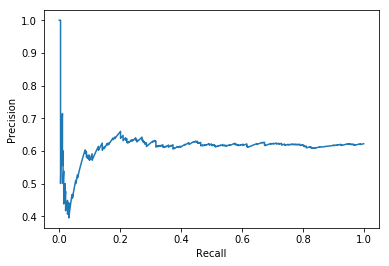

In [310]:
import matplotlib.pyplot as plt

(precision, recall, threshold) = sklearn.metrics.precision_recall_curve(y, y_prob_pred)

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot(recall, precision)


# ROC curve

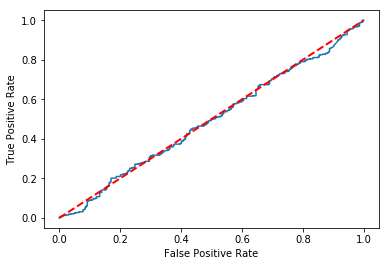

In [311]:

(fpr, tpr, threshold) = sklearn.metrics.roc_curve(y, y_prob_pred)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')



# Calibration plot


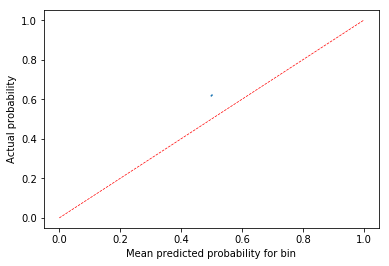

In [312]:
import sklearn.calibration

nbins = 10

(prob_true, prob_pred) = sklearn.calibration.calibration_curve(
    y, y_prob_pred, n_bins=nbins
)

plt.xlabel('Mean predicted probability for bin')
plt.ylabel('Actual probability')

plt.plot(prob_pred, prob_true)
plt.plot([0,1], [0,1], color='red', lw=0.7, linestyle='--')


# Train an ElasticNet
to predict log citations to a case.


In [313]:
import sklearn.linear_model


model = sklearn.linear_model.ElasticNet()

X = df['feature'].to_numpy()
y = df['log_cites'].to_numpy()

X = np.stack(X)

# Bring the variance to 1 on every column.
X /= np.std(X, axis=0)

assert np.any(np.isnan(X)) == False
assert np.any(np.isnan(y)) == False


y_pred = sklearn.model_selection.cross_val_predict(
    model, X, y=y, cv=4
)



## Report a scatter plot

Text(0, 0.5, 'predicted y')

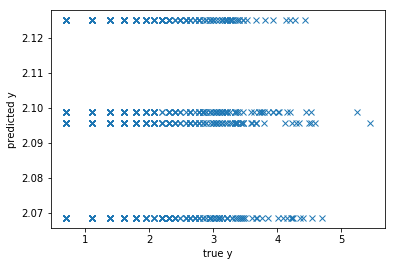

In [314]:

plt.plot(y, y_pred, 'x')

plt.xlabel('true y')
plt.ylabel('predicted y')


# Predict case reversal

## Build average cit per judge

In [315]:
df['judge_id'] = df['judge_id'].astype(int)
cdf = df.groupby(by='judge_id')
cdf = cdf['log_cites'].agg(np.mean)
print(f'We have {len(cdf)} judges.')

df['avg_judge_log_cites'] = df['judge_id'].apply(lambda jid: cdf[jid])



We have 366 judges.


In [316]:
from linearmodels.iv import IV2SLS

formula_iv = 'case_reversed ~ 1 + C(year) + [log_cites ~ avg_judge_log_cites]'
iv = IV2SLS.from_formula(formula_iv, data=df)
iv.fit()


IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:          case_reversed   R-squared:                      0.1397
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0281
No. Observations:                 776   F-statistic:                    9982.4
Date:                Thu, Apr 04 2019   P-value (F-stat)                0.0000
Time:                        22:32:44   Distribution:                 chi2(89)
Cov. Estimator:                robust                                         
                                                                              
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
Intercept           0.1423     0.0412     3.4526     0.0006      0.0615      0.2231
C(year)[T.1925]     0.4001     0.2109     1.8970     0.0578     -0.0133      0.8136
C(year)[T.1926]     0.5546     0.2263     2.4511     0.0142      0.1111      0.9981
C(year)[T.1927]     0.7986     0.1914     4.1728     0.0000      0.4235      1.1736
C(year)[T.1928]     0.1405     0.1828     0.7685     0.4422     -0.2178      0.4988
C(year)[T.1929]     0.5976     0.2783     2.1476     0.0317      0.0522      1.1430
C(year)[T.1930]     0.6214     0.2130     2.9176     0.0035      0.2040      1.0389
C(year)[T.1931]     0.2758     0.1577     1.7487     0.0803     -0.0333      0.5848
C(year)[T.1932]     0.2264     0.1451     1.5597     0.1188     -0.0581      0.5109
C(year)[T.1933]     0.5397     0.1641     3.2889     0.0010      0.2181      0.8613
C(year)[T.1934]     0.5605     0.1689     3.3181     0.0009      0.2294      0.8915
C(year)[T.1935]     0.5452     0.1676     3.2535     0.0011      0.2168      0.8736
C(year)[T.1936]     0.4675     0.1412     3.3122     0.0009      0.1909      0.7442
C(year)[T.1937]     0.6565     0.1586     4.1389     0.0000      0.3456      0.9673
C(year)[T.1938]     0.3993     0.1492     2.6766     0.0074      0.1069      0.6916
C(year)[T.1939]     0.5039     0.1192     4.2264     0.0000      0.2702      0.7375
C(year)[T.1940]     0.4949     0.1282     3.8604     0.0001      0.2437      0.7462
C(year)[T.1941]     0.9784     0.0355     27.579     0.0000      0.9088      1.0479
C(year)[T.1942]     0.6521     0.1245     5.2387     0.0000      0.4081      0.8961
C(year)[T.1943]     0.4211     0.1898     2.2187     0.0265      0.0491      0.7931
C(year)[T.1944]     0.6215     0.1345     4.6209     0.0000      0.3579      0.8851
C(year)[T.1945]     0.5375     0.1584     3.3932     0.0007      0.2270      0.8479
C(year)[T.1946]     0.4927     0.2425     2.0319     0.0422      0.0174      0.9680
C(year)[T.1947]     0.6613     0.1413     4.6801     0.0000      0.3843      0.9382
C(year)[T.1948]     0.7240     0.1528     4.7372     0.0000      0.4245      1.0236
C(year)[T.1949]    -0.0216     0.0253    -0.8547     0.3927     -0.0712      0.0280
C(year)[T.1950]     0.7900     0.1239     6.3765     0.0000      0.5472      1.0329
C(year)[T.1951]     0.7494     0.1723     4.3487     0.0000      0.4116      1.0872
C(year)[T.1952]     0.7239     0.1715     4.2205     0.0000      0.3877      1.0600
C(year)[T.1953]     0.7057     0.2122     3.3252     0.0009      0.2898      1.1217
C(year)[T.1954]     0.5605     0.1919     2.9205     0.0035      0.1843      0.9366
C(year)[T.1955]     0.6700     0.1680     3.9885     0.0001      0.3408      0.9992
C(year)[T.1956]     0.5625     0.1446     3.8894     0.0001      0.2791      0.8460
C(year)[T.1957]     0.3814     0.1491     2.5581     0.0105      0.0892      0.6736
C(year)[T.1958]     0.6620     0.1585     4.1771     0.0000      0.3514      0.9726
C(year)[T.1959]     0.7371     0.1173  

# Perform LDA on the cases

## Build frequency vectors
For the normalized tokens

In [319]:
import sklearn.decomposition
import sklearn.feature_extraction

def make_word_freq(doc):
    ret = {}
    for t in doc:
        word = process_token(t)
        if not word:
            continue

        if word in ret:
            cnt = ret[word] + 1
        else:
            cnt = 1
        ret[word] = cnt
    return ret


df['word_freq'] = df['doc'].swifter.apply(make_word_freq)

cvec = sklearn.feature_extraction.DictVectorizer(sparse=False)
cvec.fit(df['word_freq'])

df['word_freq'] = df['word_freq'].swifter.apply(lambda x : cvec.transform(x)[0])


Pandas Apply:   0%|          | 0/776 [00:00<?, ?it/s]

Pandas Apply:   2%|▏         | 12/776 [00:00<00:06, 116.34it/s]

Pandas Apply:   2%|▏         | 19/776 [00:00<00:07, 95.95it/s] 

Pandas Apply:   4%|▍         | 32/776 [00:00<00:07, 102.44it/s]

Pandas Apply:   5%|▌         | 39/776 [00:00<00:08, 82.87it/s] 

Pandas Apply:   7%|▋         | 51/776 [00:00<00:08, 89.54it/s]

Pandas Apply:   8%|▊         | 64/776 [00:00<00:07, 98.48it/s]

Pandas Apply:  10%|▉         | 75/776 [00:00<00:07, 99.72it/s]

Pandas Apply:  11%|█         | 85/776 [00:00<00:07, 96.91it/s]

Pandas Apply:  12%|█▎        | 97/776 [00:00<00:06, 102.44it/s]

Pandas Apply:  14%|█▍        | 108/776 [00:01<00:06, 100.51it/s]

Pandas Apply:  16%|█▌        | 121/776 [00:01<00:06, 107.77it/s]

Pandas Apply:  17%|█▋        | 132/776 [00:01<00:06, 106.57it/s]

Pandas Apply:  19%|█▊        | 144/776 [00:01<00:05, 108.08it/s]

Pandas Apply:  20%|█▉        | 155/776 [00:01<00:06, 102.41it/s]

Pandas Apply:  22%|██▏       | 169/776 [00:01<00:05, 101.59it/s]

Pandas Apply:  24%|██▍       | 187/776 [00:01<00:05, 111.17it/s]

Pandas Apply:  26%|██▌       | 200/776 [00:01<00:05, 112.00it/s]

Pandas Apply:  27%|██▋       | 212/776 [00:01<00:05, 112.10it/s]

Pandas Apply:  29%|██▉       | 224/776 [00:02<00:04, 112.94it/s]

Pandas Apply:  30%|███       | 236/776 [00:02<00:05, 98.72it/s] 

Pandas Apply:  32%|███▏      | 247/776 [00:02<00:05, 93.15it/s]

Pandas Apply:  33%|███▎      | 257/776 [00:02<00:05, 93.11it/s]

Pandas Apply:  35%|███▌      | 272/776 [00:02<00:04, 100.86it/s]

Pandas Apply:  36%|███▋      | 283/776 [00:02<00:05, 94.62it/s] 

Pandas Apply:  38%|███▊      | 294/776 [00:02<00:04, 97.60it/s]

Pandas Apply:  40%|███▉      | 307/776 [00:02<00:04, 104.22it/s]

Pandas Apply:  41%|████▏     | 321/776 [00:03<00:04, 108.26it/s]

Pandas Apply:  43%|████▎     | 333/776 [00:03<00:04, 106.21it/s]

Pandas Apply:  44%|████▍     | 344/776 [00:03<00:04, 96.47it/s] 

Pandas Apply:  46%|████▌     | 354/776 [00:03<00:04, 96.56it/s]

Pandas Apply:  47%|████▋     | 366/776 [00:03<00:04, 102.21it/s]

Pandas Apply:  49%|████▊     | 378/776 [00:03<00:03, 105.44it/s]

Pandas Apply:  50%|█████     | 389/776 [00:03<00:03, 102.03it/s]

Pandas Apply:  52%|█████▏    | 400/776 [00:03<00:04, 91.22it/s] 

Pandas Apply:  53%|█████▎    | 415/776 [00:04<00:03, 103.13it/s]

Pandas Apply:  55%|█████▌    | 427/776 [00:04<00:03, 92.85it/s] 

Pandas Apply:  57%|█████▋    | 439/776 [00:04<00:03, 95.98it/s]

Pandas Apply:  58%|█████▊    | 452/776 [00:04<00:03, 103.61it/s]

Pandas Apply:  60%|█████▉    | 464/776 [00:04<00:02, 105.83it/s]

Pandas Apply:  62%|██████▏   | 478/776 [00:04<00:02, 112.07it/s]

Pandas Apply:  63%|██████▎   | 490/776 [00:04<00:02, 112.73it/s]

Pandas Apply:  65%|██████▍   | 504/776 [00:04<00:02, 115.86it/s]

Pandas Apply:  66%|██████▋   | 516/776 [00:04<00:02, 112.17it/s]

Pandas Apply:  68%|██████▊   | 529/776 [00:05<00:02, 115.56it/s]

Pandas Apply:  70%|██████▉   | 541/776 [00:05<00:02, 103.19it/s]

Pandas Apply:  71%|███████▏  | 553/776 [00:05<00:02, 105.33it/s]

Pandas Apply:  73%|███████▎  | 564/776 [00:05<00:02, 105.14it/s]

Pandas Apply:  74%|███████▍  | 575/776 [00:05<00:01, 100.99it/s]

Pandas Apply:  76%|███████▌  | 586/776 [00:05<00:02, 88.36it/s] 

Pandas Apply:  77%|███████▋  | 596/776 [00:05<00:02, 83.73it/s]

Pandas Apply:  78%|███████▊  | 607/776 [00:05<00:01, 89.11it/s]

Pandas Apply:  80%|███████▉  | 618/776 [00:06<00:01, 92.44it/s]

Pandas Apply:  81%|████████  | 628/776 [00:06<00:01, 93.42it/s]

Pandas Apply:  83%|████████▎ | 641/776 [00:06<00:01, 101.71it/s]

Pandas Apply:  84%|████████▍ | 652/776 [00:06<00:01, 97.58it/s] 

Pandas Apply:  86%|████████▌ | 664/776 [00:06<00:01, 101.72it/s]

Pandas Apply:  87%|████████▋ | 675/776 [00:06<00:01, 93.63it/s] 

Pandas Apply:  89%|████████▊ | 687/776 [00:06<00:00, 99.78it/s]

Pandas Apply:  90%|█████████ | 700/776 [00:06<00:00, 105.88it/s]

Pandas Apply:  92%|█████████▏| 712/776 [00:06<00:00, 109.28it/s]

Pandas Apply:  93%|█████████▎| 724/776 [00:07<00:00, 103.83it/s]

Pandas Apply:  95%|█████████▍| 735/776 [00:07<00:00, 95.92it/s] 

Pandas Apply:  96%|█████████▌| 746/776 [00:07<00:00, 95.56it/s]

Pandas Apply:  97%|█████████▋| 756/776 [00:07<00:00, 88.37it/s]

Pandas Apply:  99%|█████████▉| 769/776 [00:07<00:00, 97.07it/s]

Pandas Apply: 100%|██████████| 776/776 [00:07<00:00, 102.35it/s]

Pandas Apply:   0%|          | 0/776 [00:00<?, ?it/s]

Pandas Apply:  32%|███▏      | 249/776 [00:00<00:00, 2485.78it/s]

Pandas Apply:  66%|██████▌   | 511/776 [00:00<00:00, 2522.70it/s]

Pandas Apply:  96%|█████████▌| 742/776 [00:00<00:00, 2454.61it/s]

Pandas Apply: 100%|██████████| 776/776 [00:00<00:00, 2458.22it/s]

In [320]:
## Build LDA

In [321]:

lda = sklearn.decomposition.LatentDirichletAllocation()

X = df['word_freq'].to_numpy()

X = np.stack(X)

print(X.shape)

lda.fit(X)


(776, 34677)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [322]:
# Build a word cloud for the topics

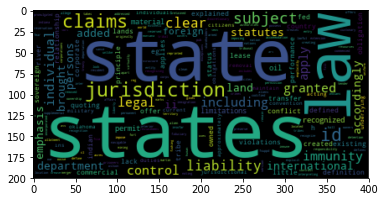

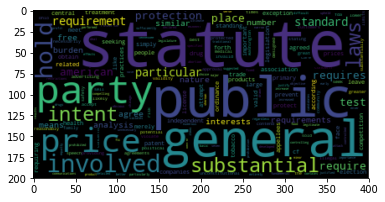

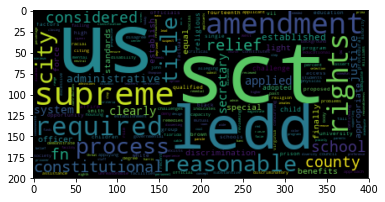

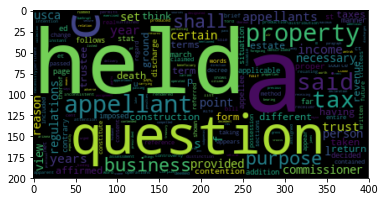

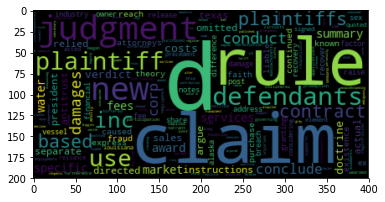

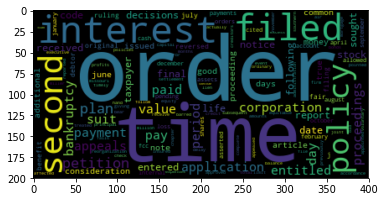

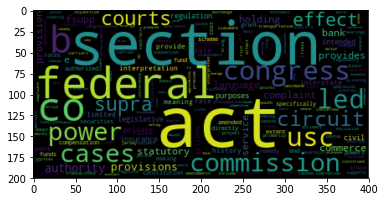

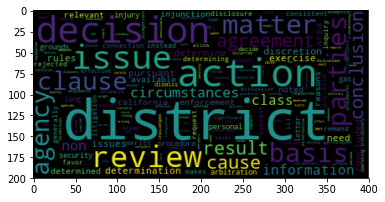

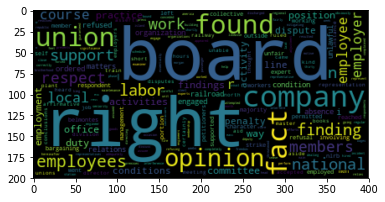

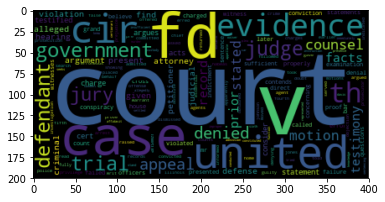

In [327]:
from wordcloud import WordCloud
from random import randint, shuffle

global_freq_per_index = np.sum(X, axis=0)

def words_for_topic(topic: int):
    def word_for_index(i):
        return cvec.get_feature_names()[i]

    dist = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
    assn = np.argmax(dist, axis=0)
    total = X.shape[1]

    ret = {}
    for i in range(total):
        if assn[i] != topic:
            continue
        ret[word_for_index(i)] = global_freq_per_index[i]
    return ret

for t in range(0, 10):
    words = words_for_topic(t)
    wordcloud = WordCloud().generate_from_frequencies(words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

In [ ]:
# Try different component values

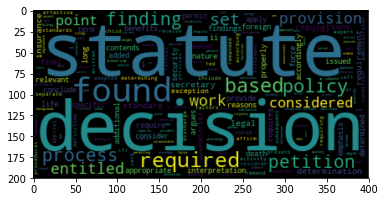

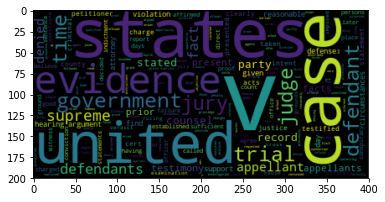

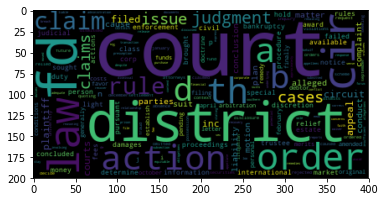

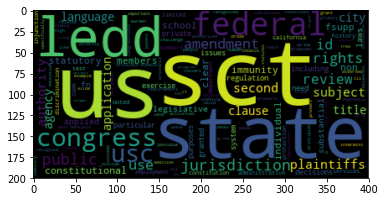

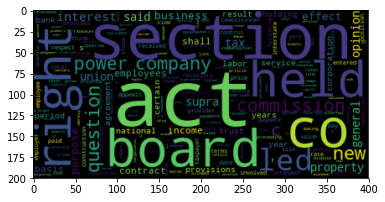

In [328]:

n_components = 5

lda = sklearn.decomposition.LatentDirichletAllocation(n_components=n_components)
lda.fit(X)

for t in range(0, n_components):
    words = words_for_topic(t)
    wordcloud = WordCloud().generate_from_frequencies(words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()



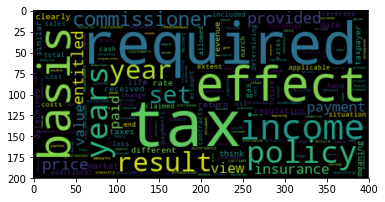

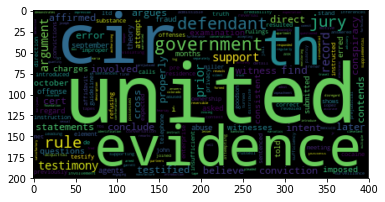

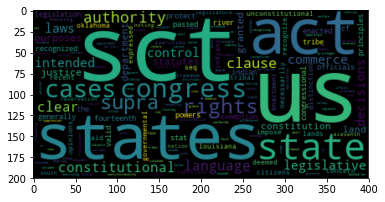

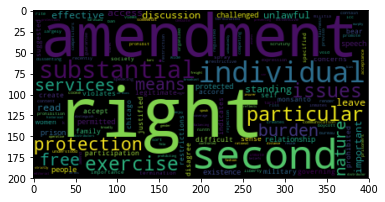

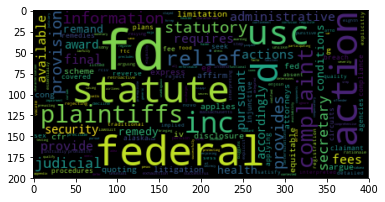

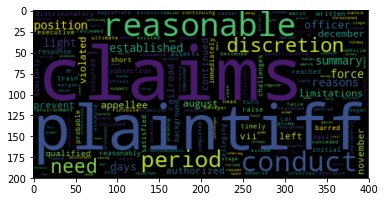

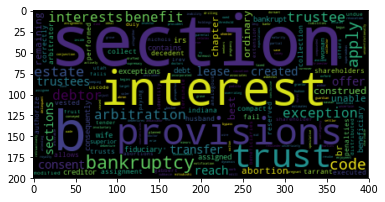

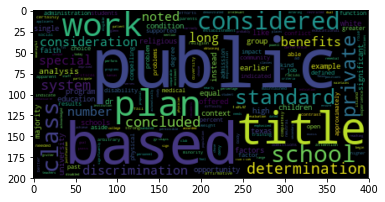

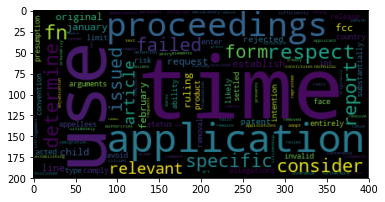

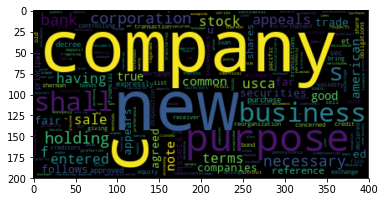

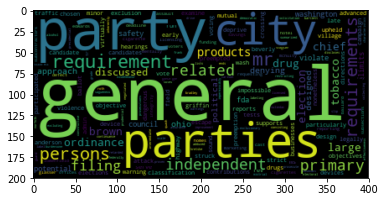

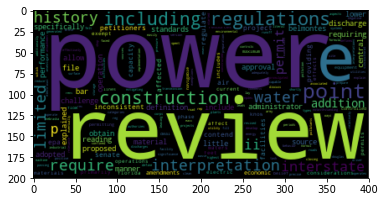

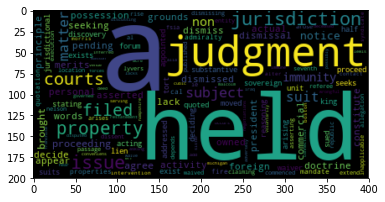

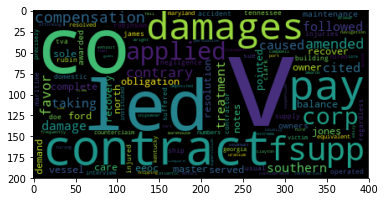

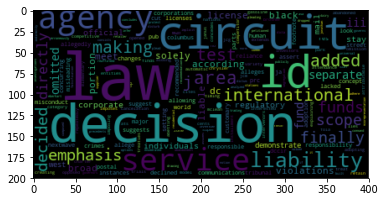

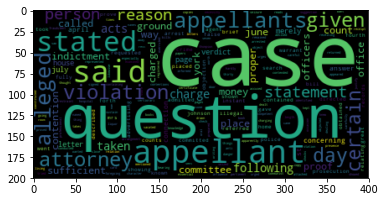

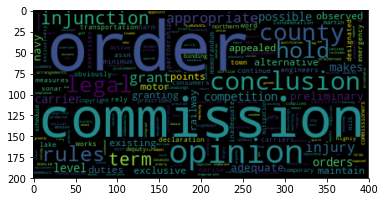

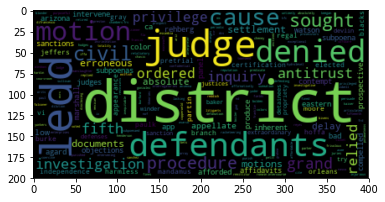

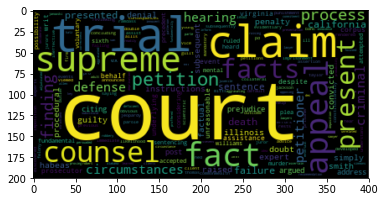

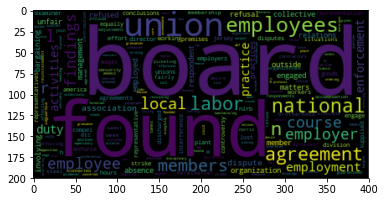

In [329]:


n_components = 20

lda = sklearn.decomposition.LatentDirichletAllocation(n_components=n_components)
lda.fit(X)

for t in range(0, n_components):
    words = words_for_topic(t)
    wordcloud = WordCloud().generate_from_frequencies(words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()


# Replace with neural networks

In [ ]:

import tensorflow.keras as keras


